# R.O.C.K.S (RedCarpet Open Code and Kraft Series) task 

# Uddipta Khndait 

### phone: 8240042104, email: ukhandait@gmail.com

## Step 1

### Importing required libraries

In [1]:

import  matplotlib.pyplot  as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Importing the data

In [2]:
base_folder = 'C:/Users/Uddipta Khandait/Downloads/'
data = pd.read_excel(base_folder + '2010 Federal STEM Education Inventory Data Set.xls', header = 1)

In [3]:
data.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Unnamed: 246,Unnamed: 247,Y3) Process or Implementation Evaluation Type,Unnamed: 249,Unnamed: 250,Y4) Portfolio Evaluation/Review Type,Unnamed: 252,Unnamed: 253,Y5) Expert Review Type,Unnamed: 255
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


### Checking shape and colums  names 

In [4]:
data.shape

(253, 256)

In [5]:
data.columns

Index(['Index Number', 'Investment Name', 'Agency', 'Subagency',
       'A) Brief Description', 'B) Year Established', 'C1) Funding FY2008',
       'C2) Funding FY2009', 'C3) Funding FY2010',
       'D) Mission-specific or General STEM?',
       ...
       'Unnamed: 246', 'Unnamed: 247',
       'Y3) Process or Implementation Evaluation Type', 'Unnamed: 249',
       'Unnamed: 250', 'Y4) Portfolio Evaluation/Review Type', 'Unnamed: 252',
       'Unnamed: 253', 'Y5) Expert Review Type', 'Unnamed: 255'],
      dtype='object', length=256)

In [6]:
per_change_df = pd.DataFrame()
per_change_df['Index Number'] = data['Index Number']
per_change_df['Percent change'] = ((data['C2) Funding FY2009'] - data['C1) Funding FY2008'])/data['C1) Funding FY2008'])
per_change_df['Target'] = np.where(per_change_df['Percent change'] > 0, 1, 0)
per_change_df.head()

,Index Number,Percent change,Target
0,PRG_0001,0.372137,1
1,PRG_0002,0.000000,0
2,PRG_0003,0.000000,0
3,PRG_0004,1.579869,1
4,PRG_0005,0.680982,1


In [7]:
print('If there is any null values in Target')
per_change_df['Target'].isnull().sum()

If there is any null values in Target


0

* Target has no null values

In [8]:
per_change_df = data.merge(per_change_df, on = 'Index Number')
'Target' in per_change_df.columns and 'Percent change' in per_change_df

True

### Stage 2

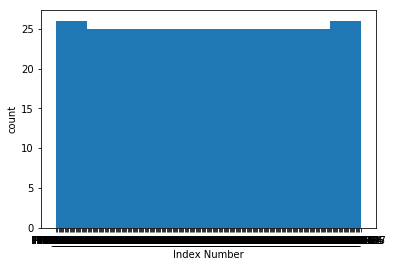

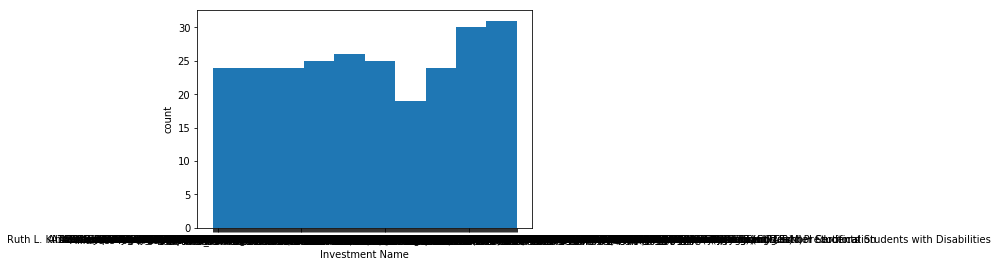

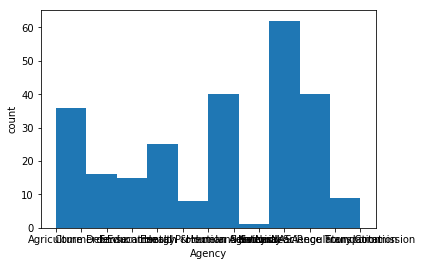

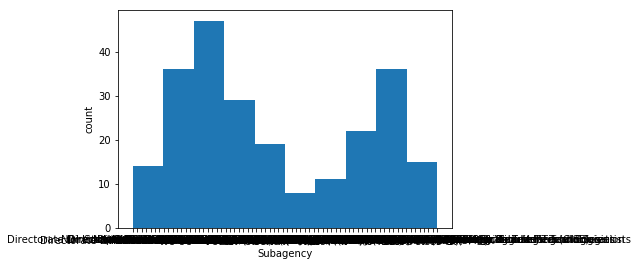

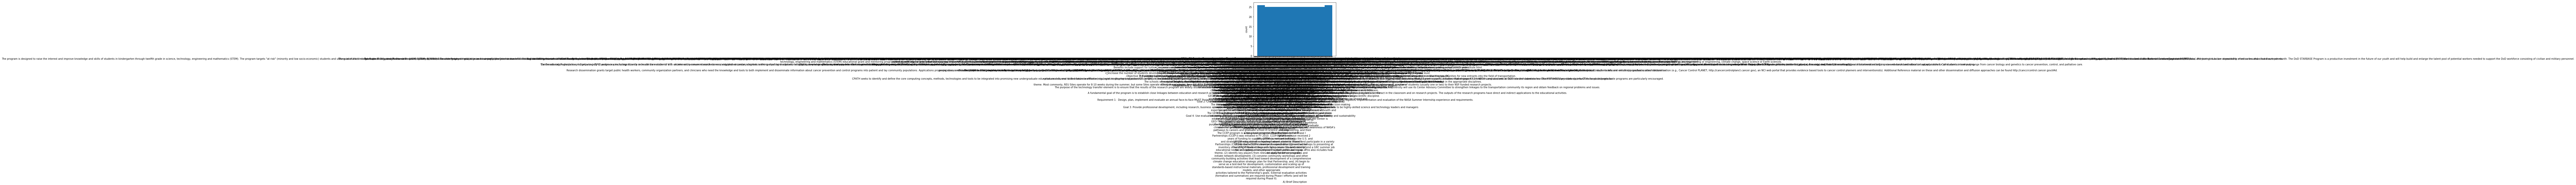

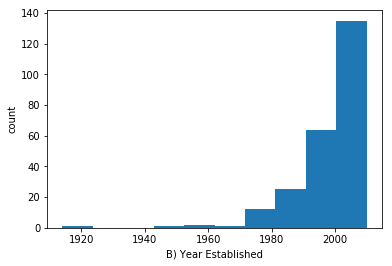

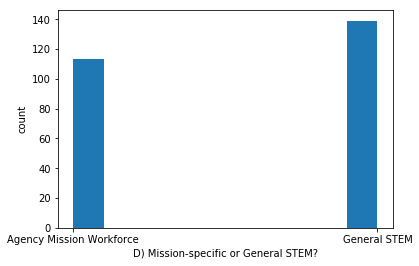

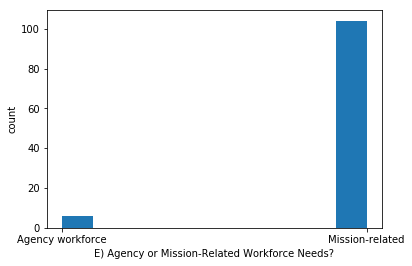

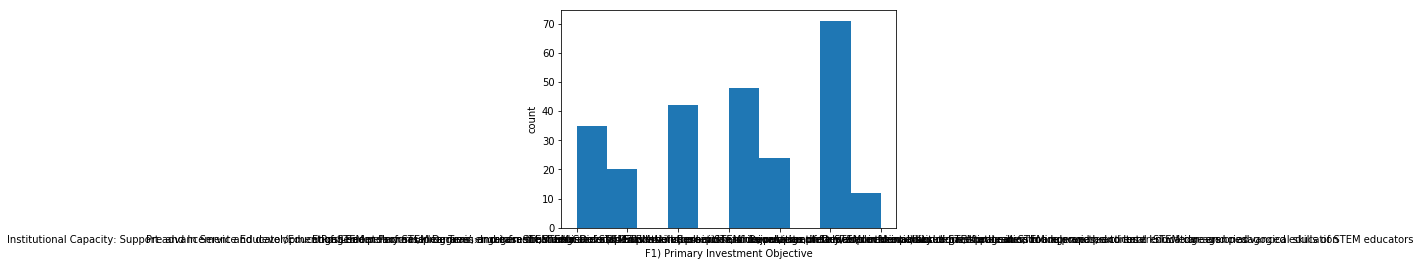

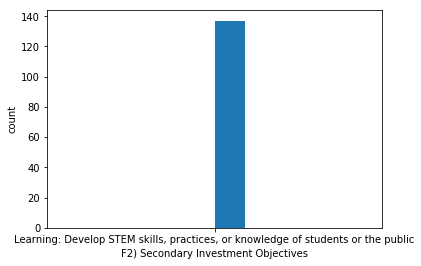

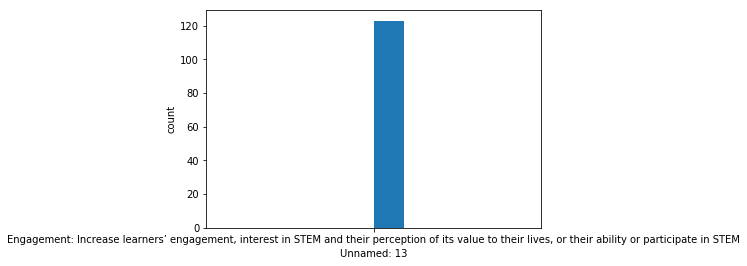

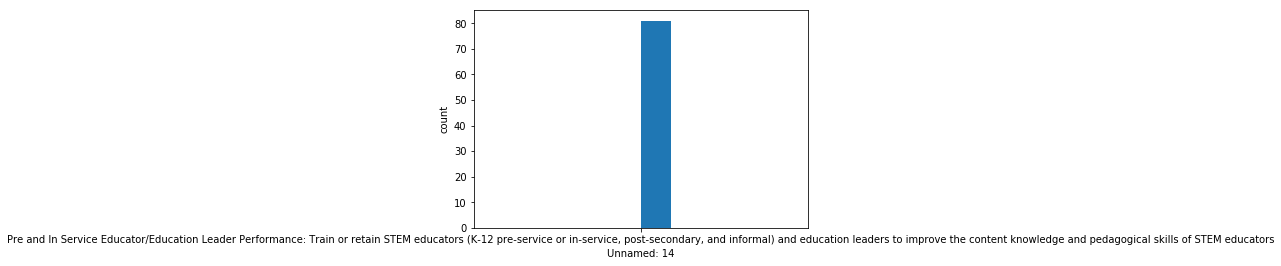

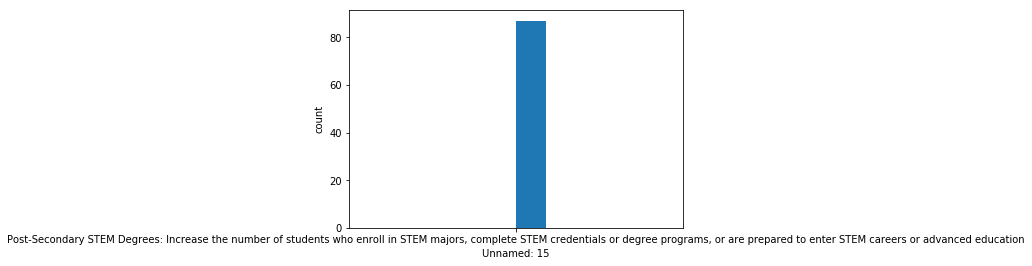

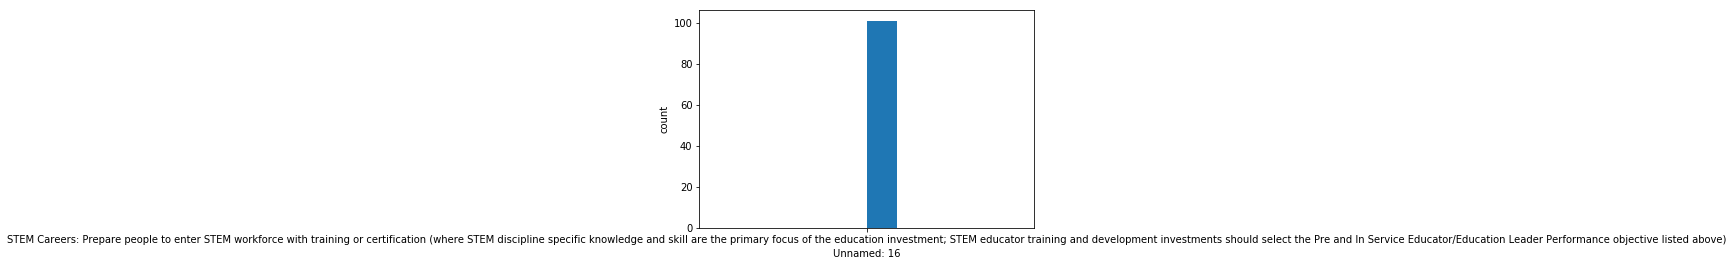

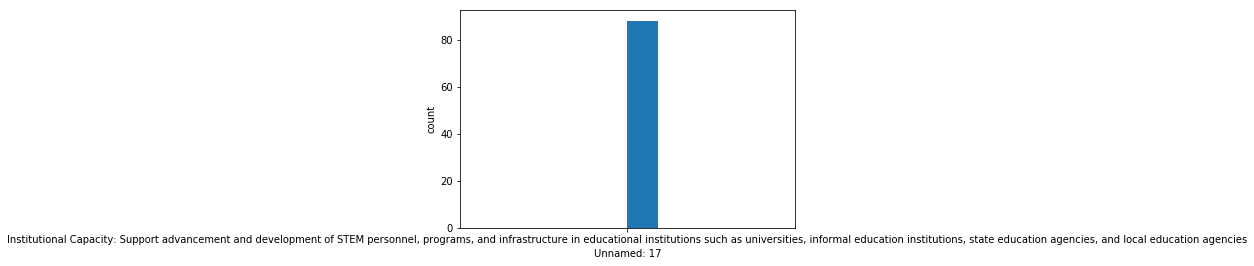

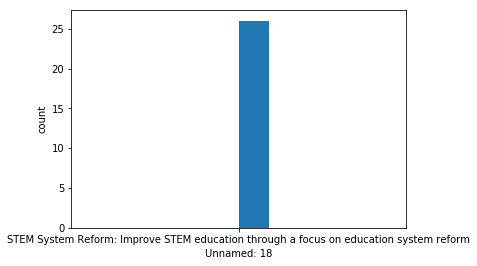

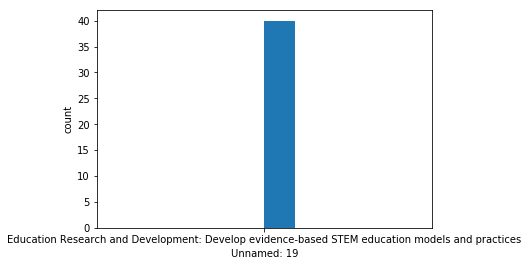

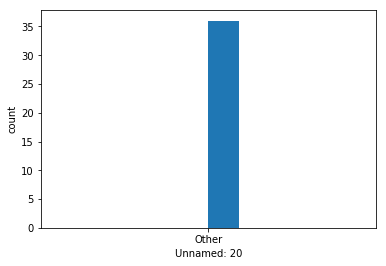

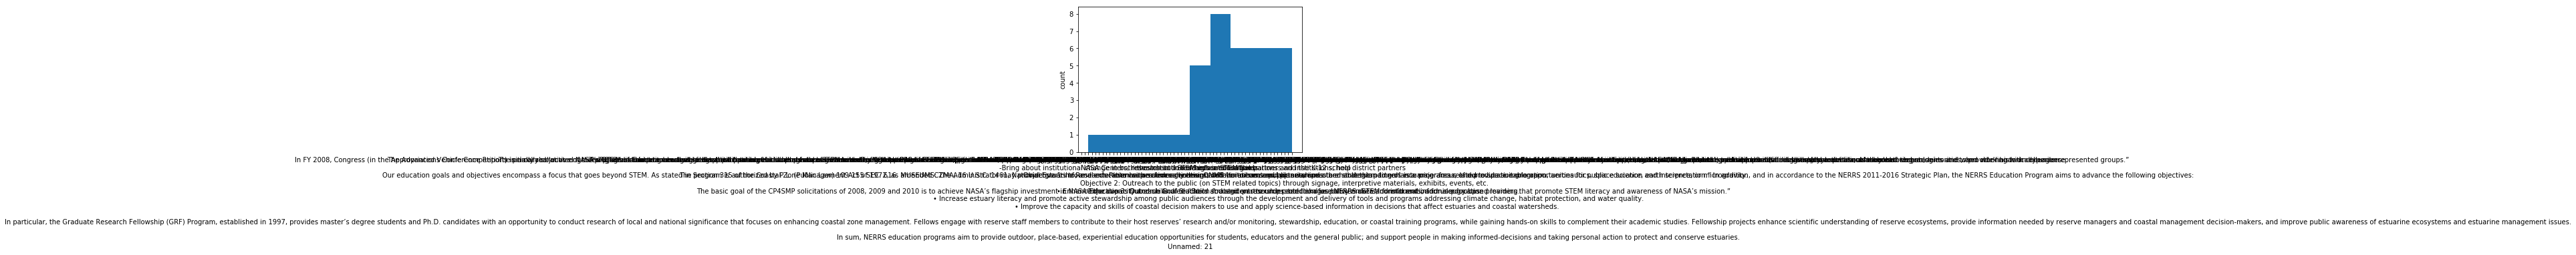

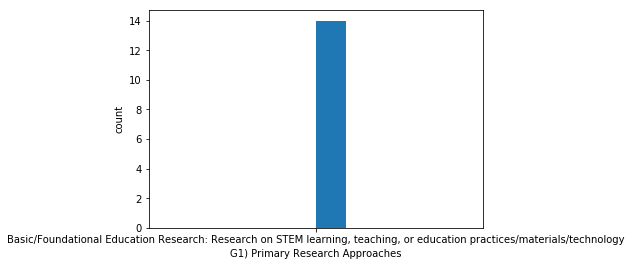

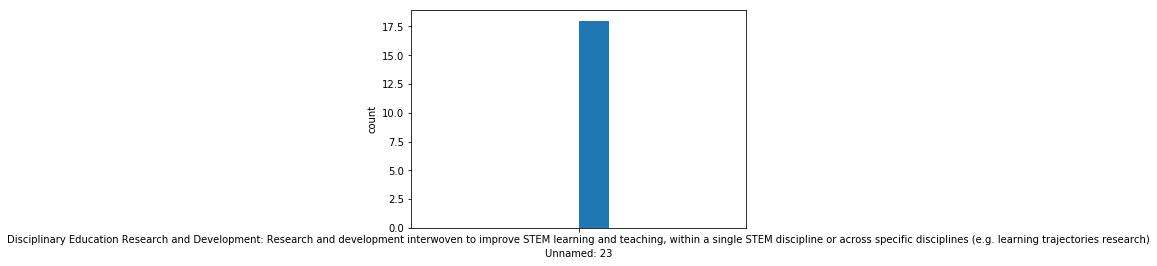

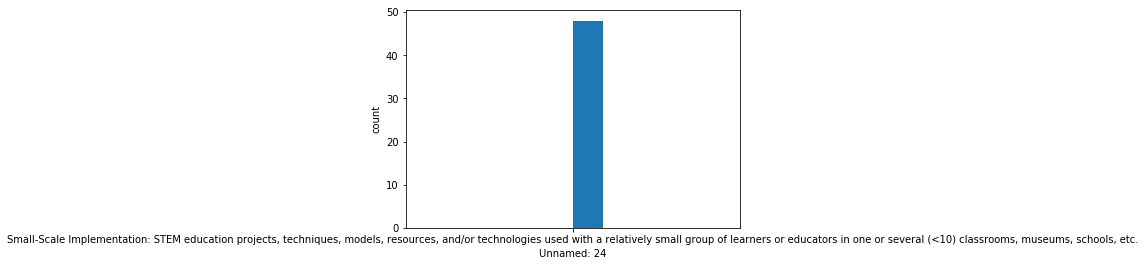

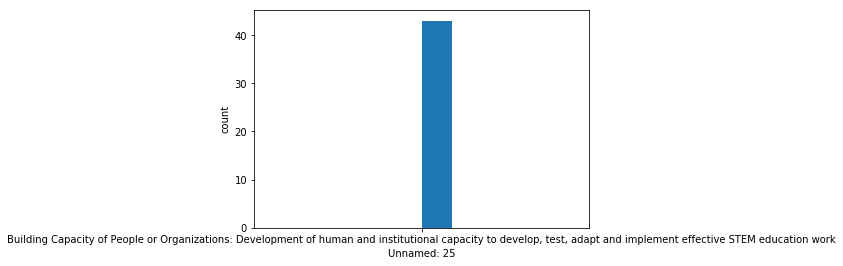

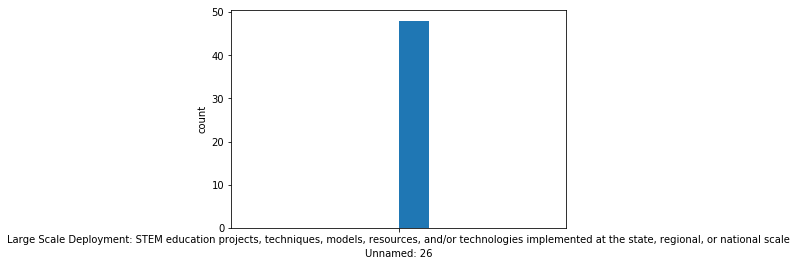

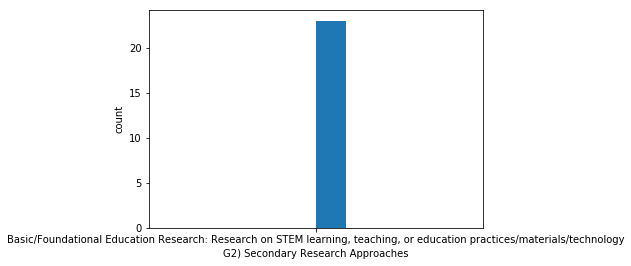

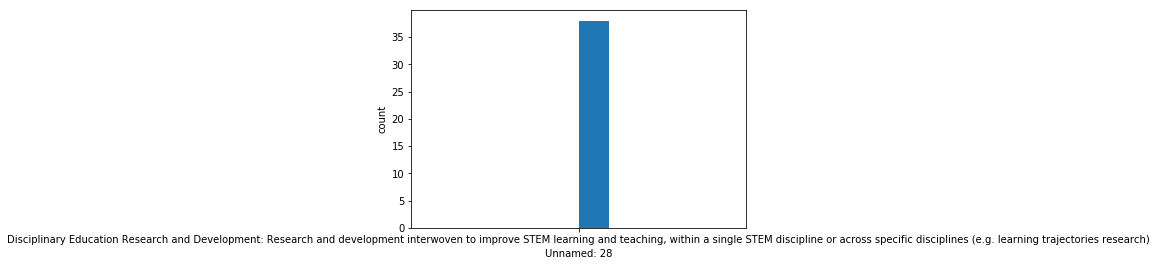

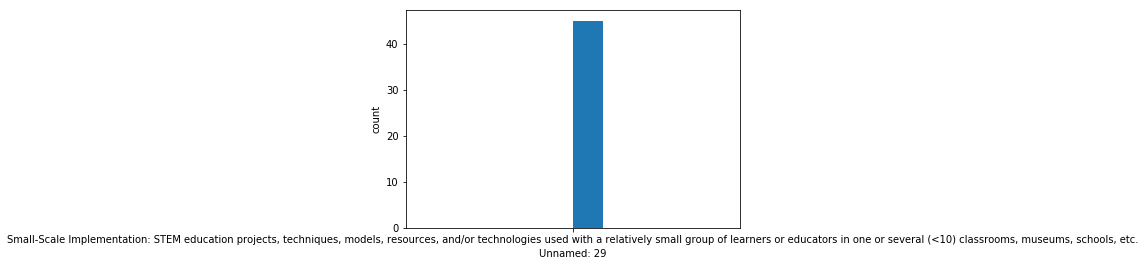

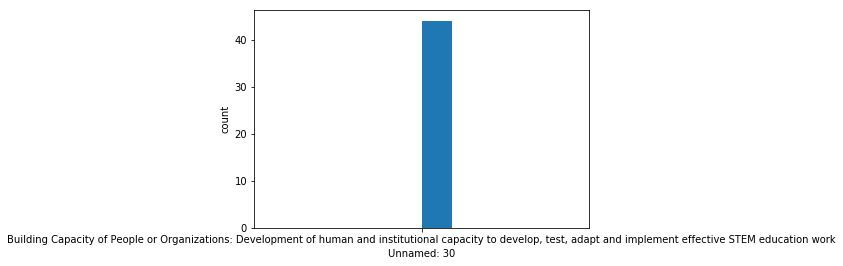

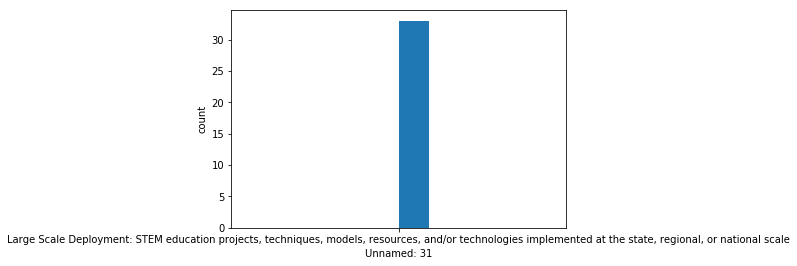

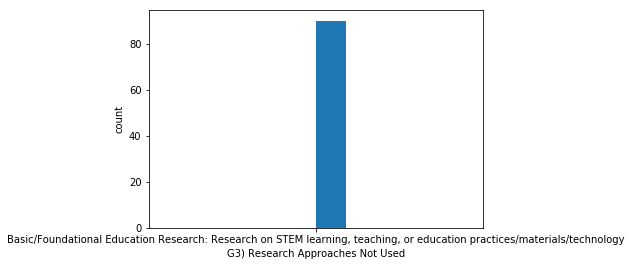

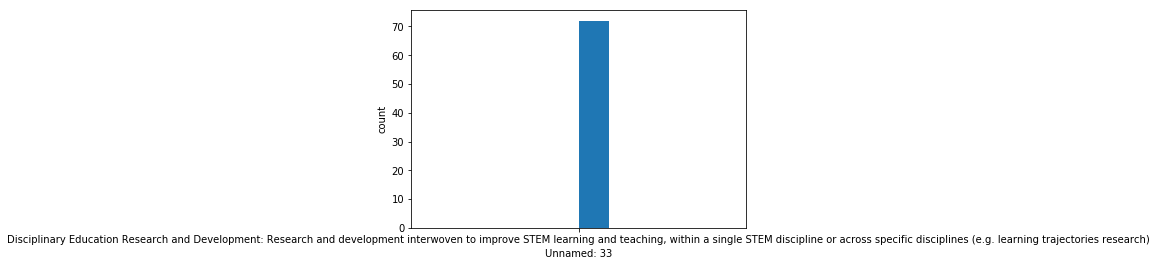

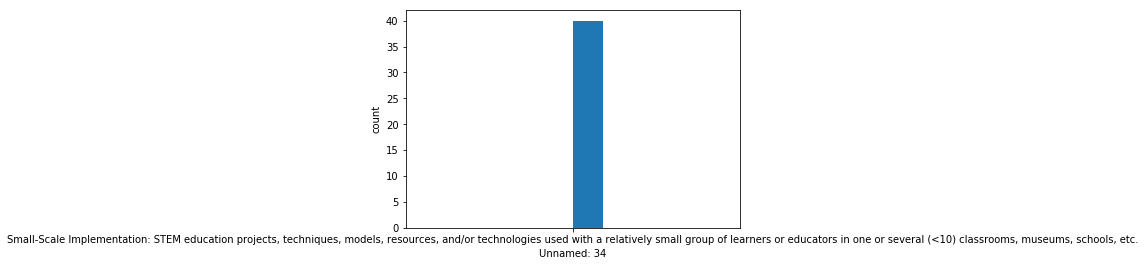

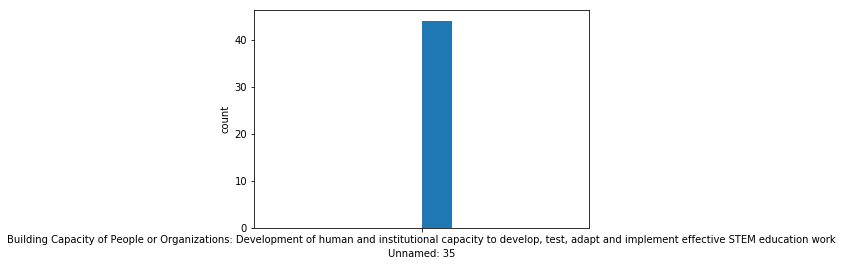

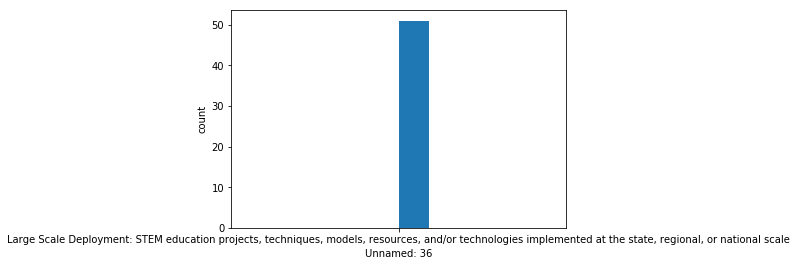

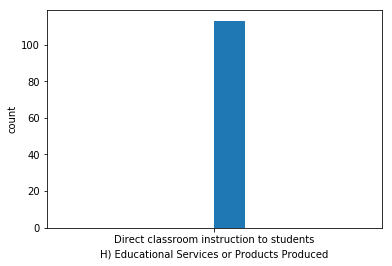

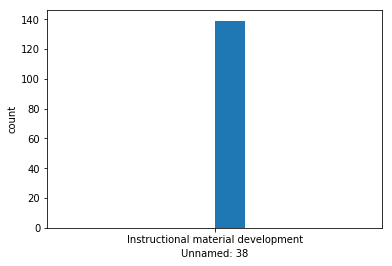

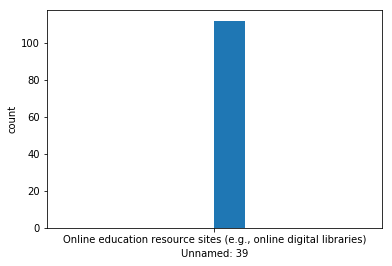

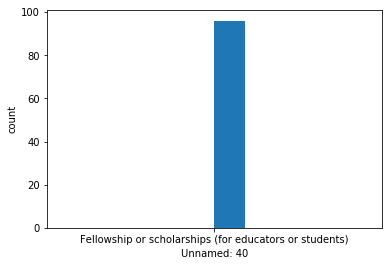

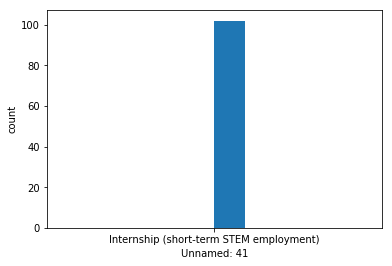

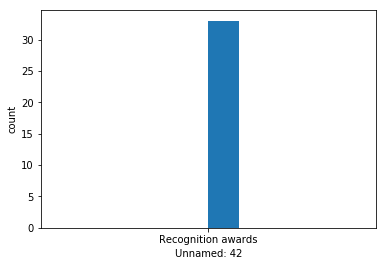

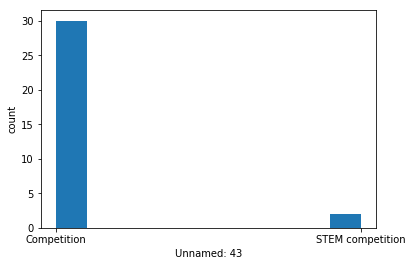

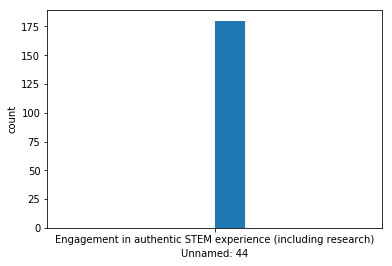

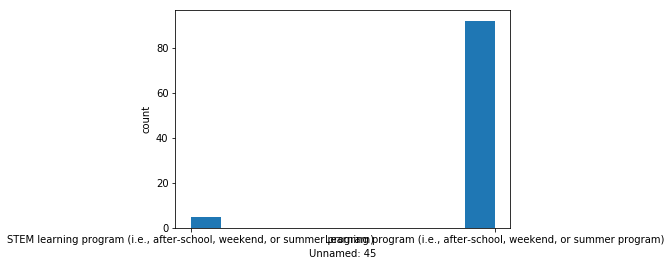

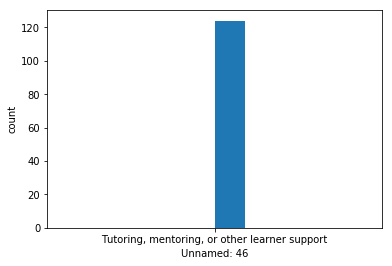

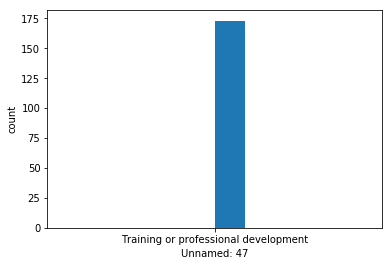

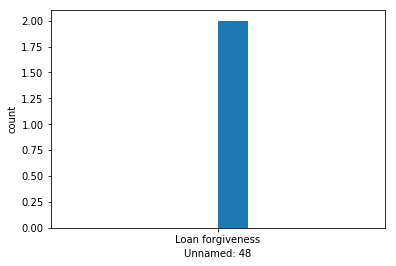

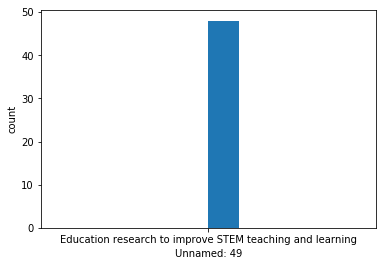

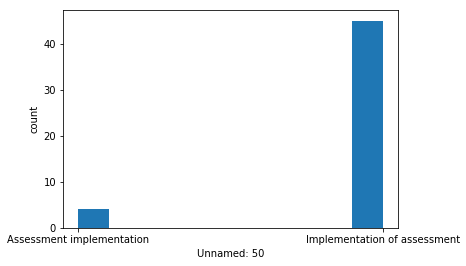

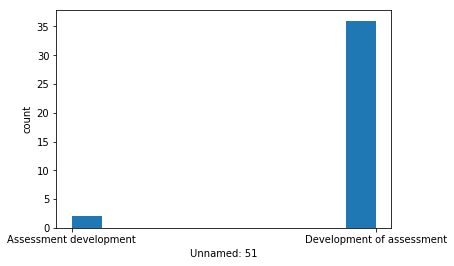

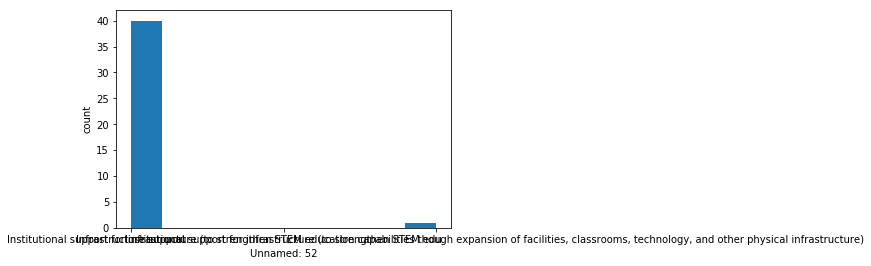

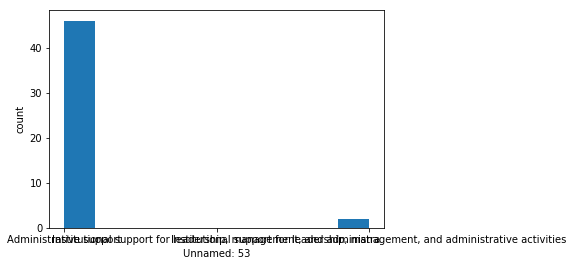

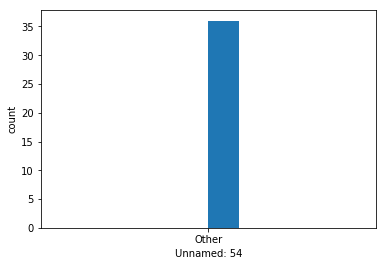

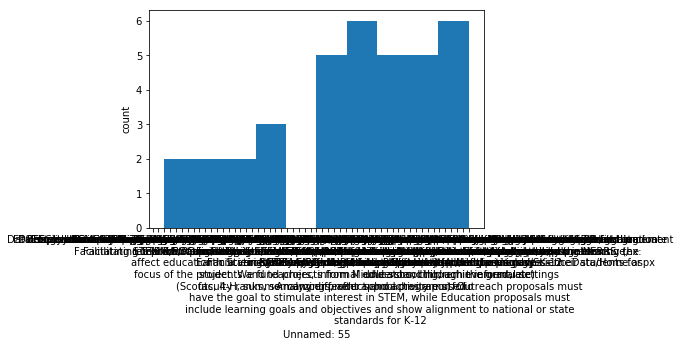

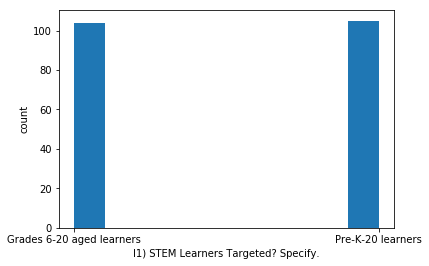

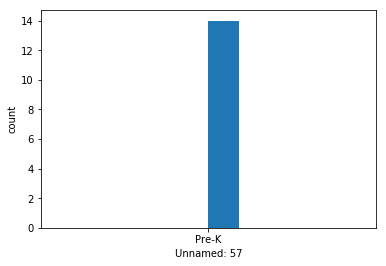

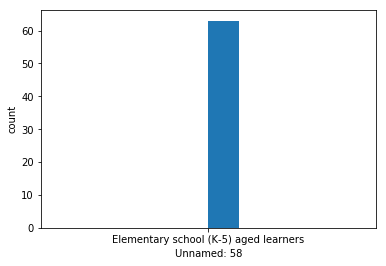

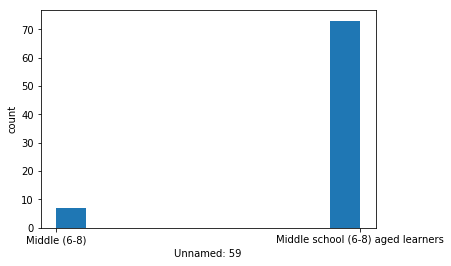

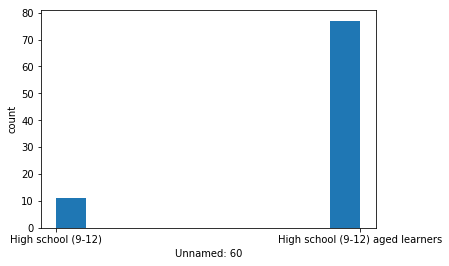

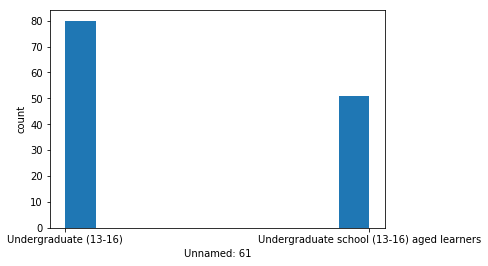

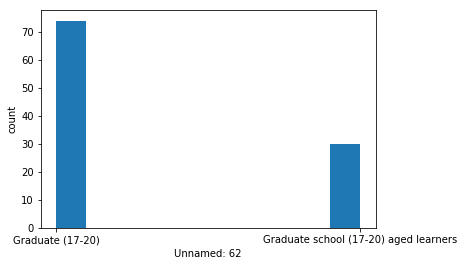

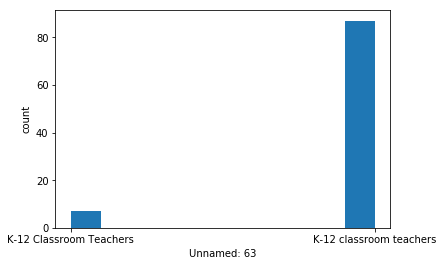

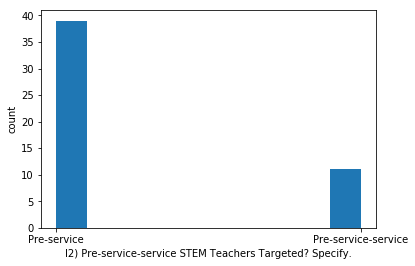

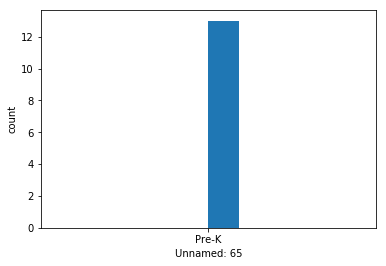

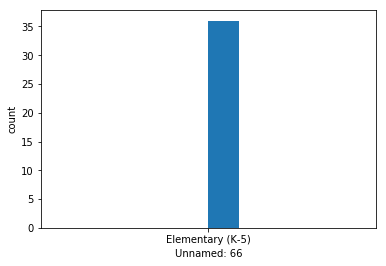

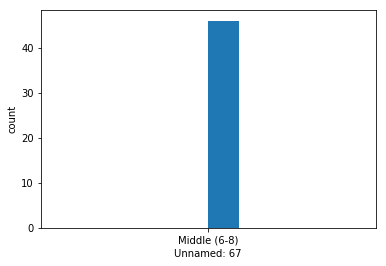

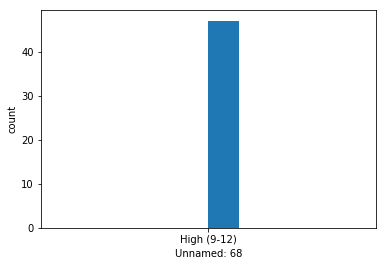

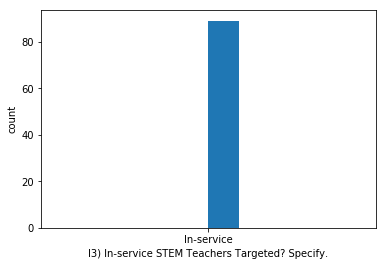

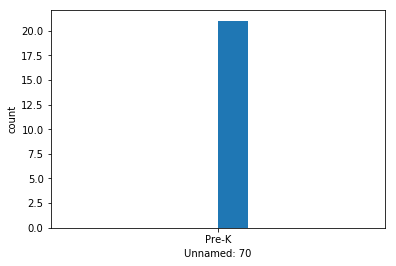

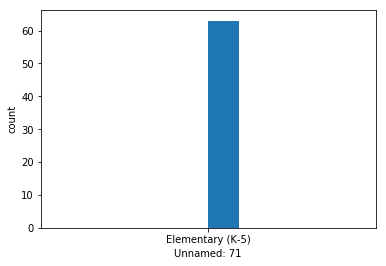

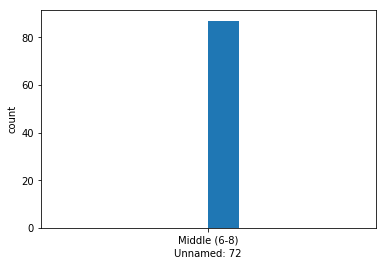

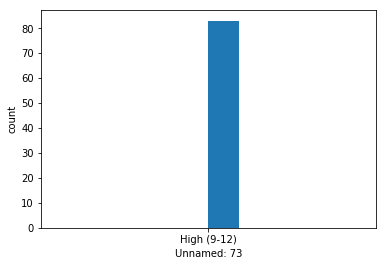

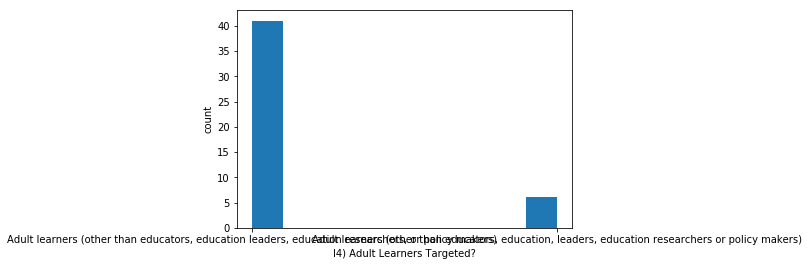

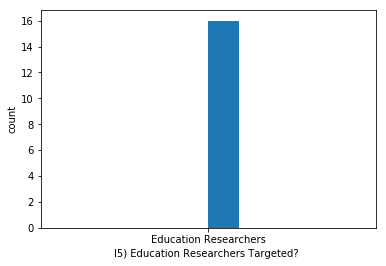

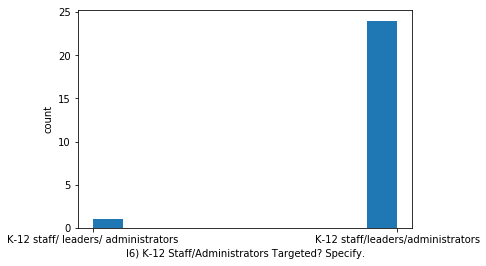

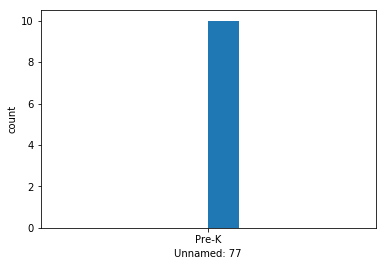

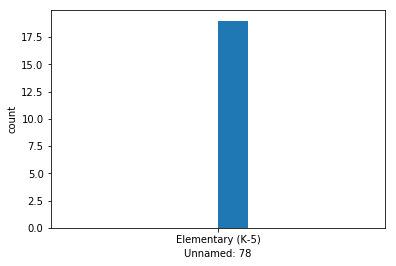

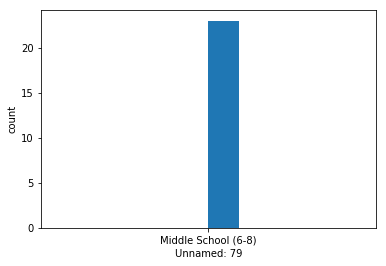

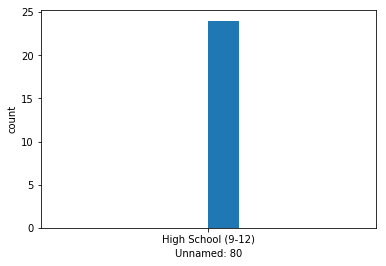

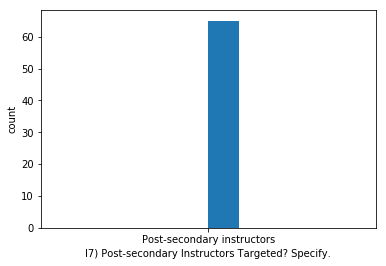

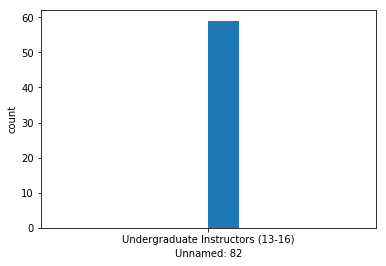

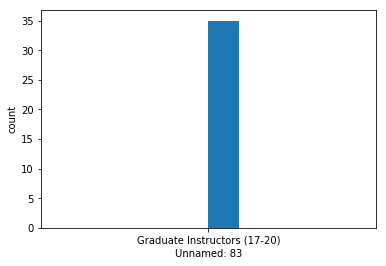

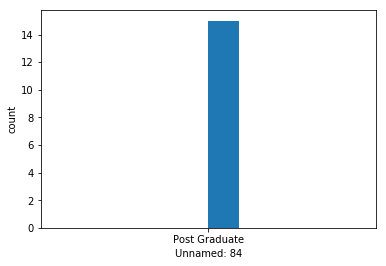

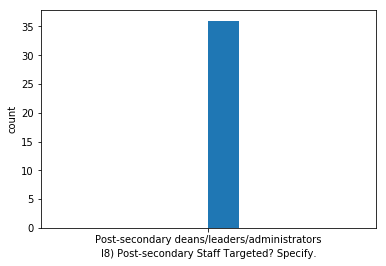

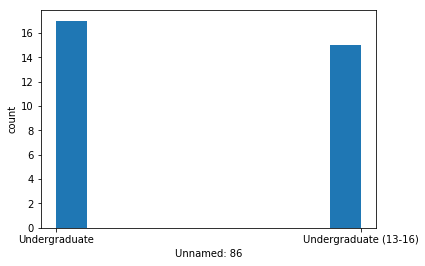

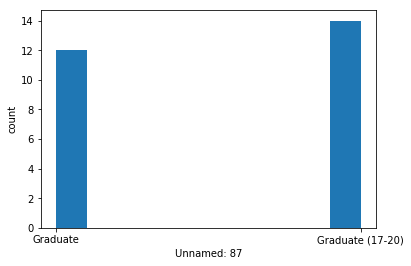

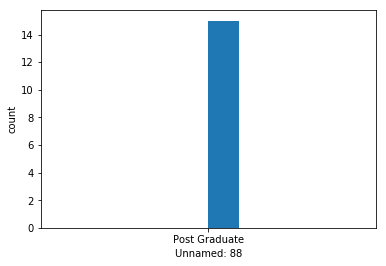

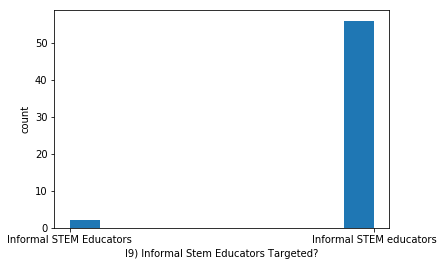

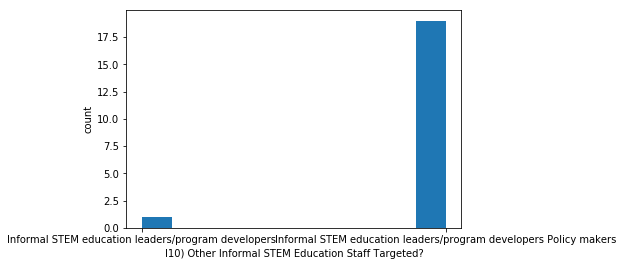

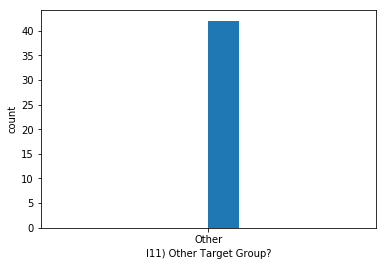

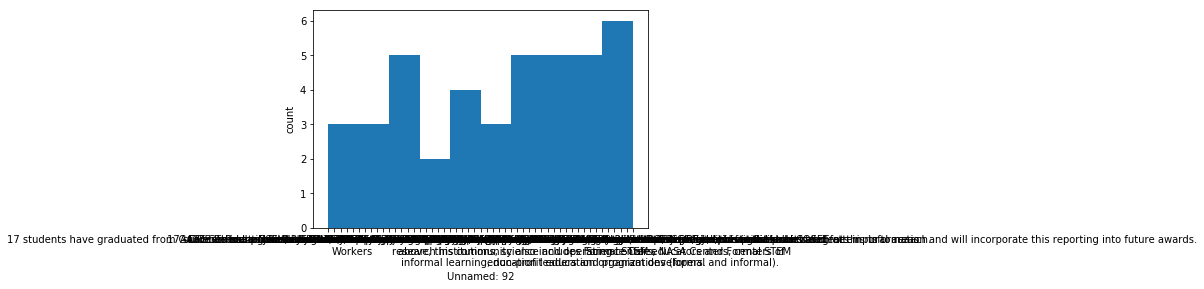

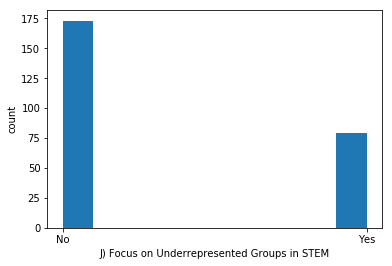

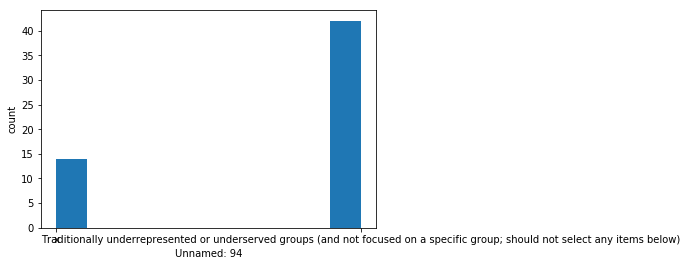

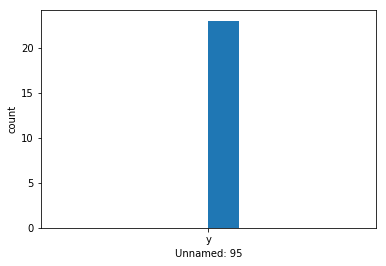

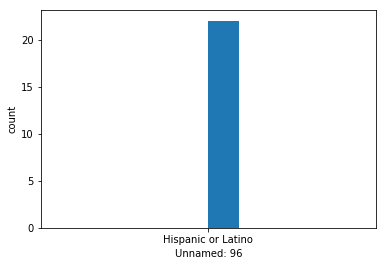

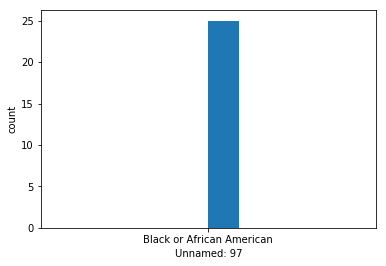

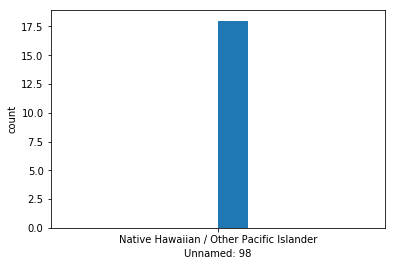

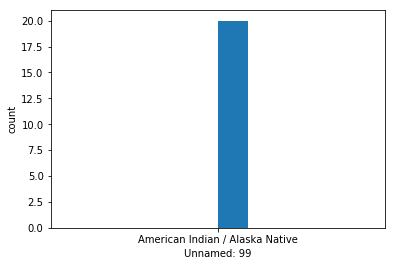

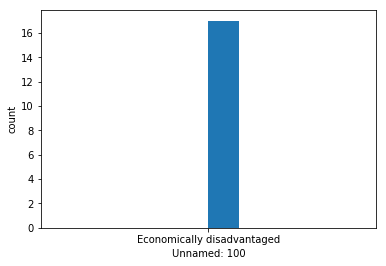

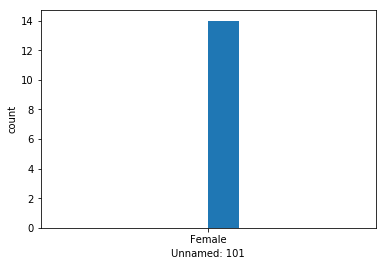

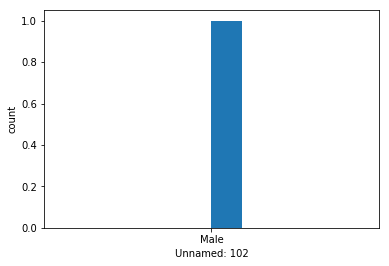

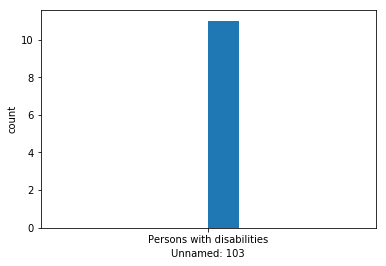

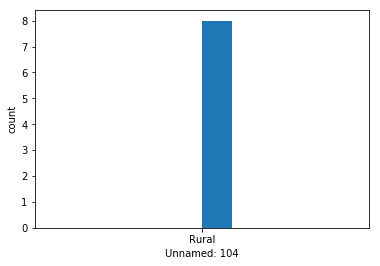

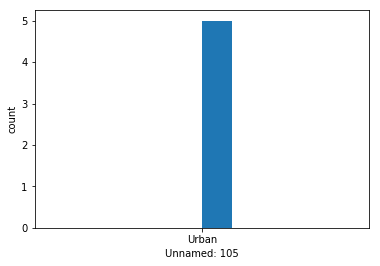

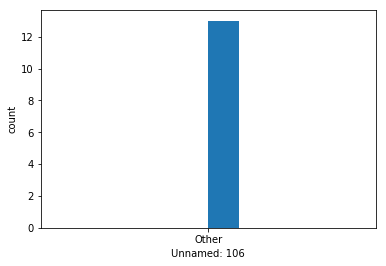

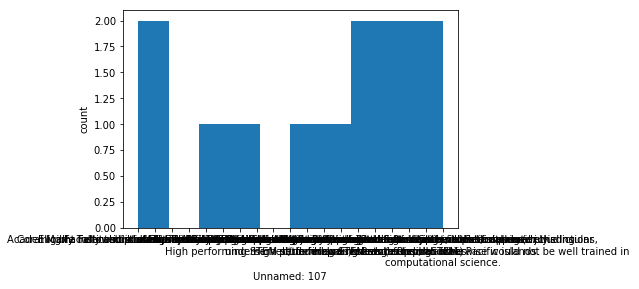

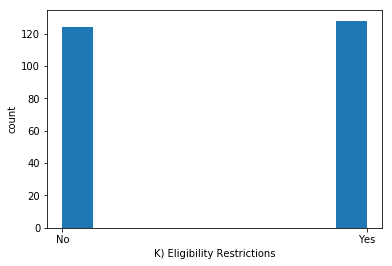

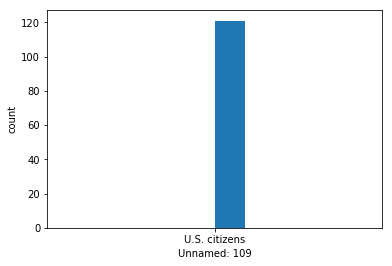

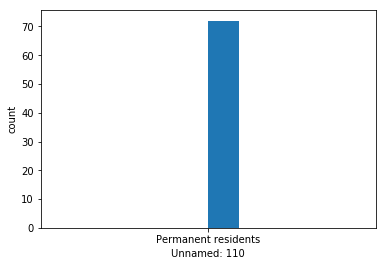

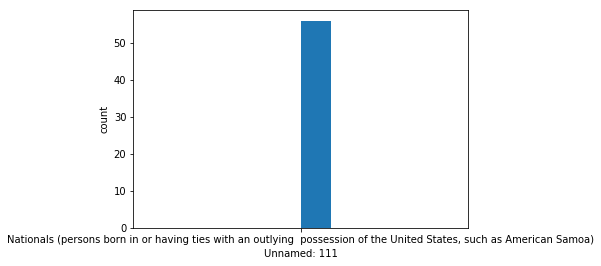

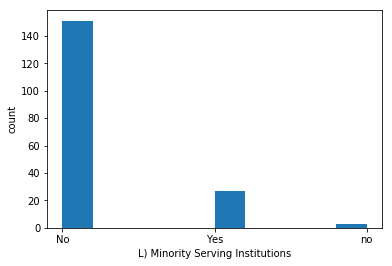

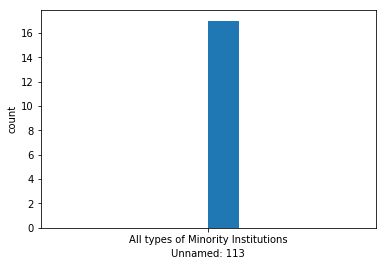

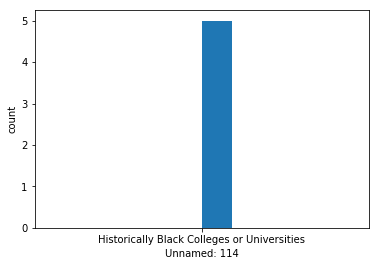

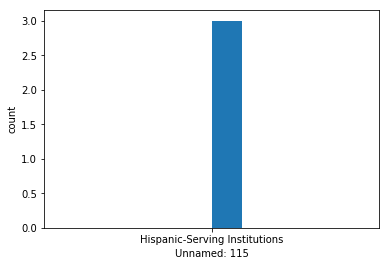

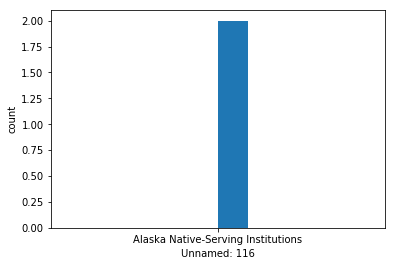

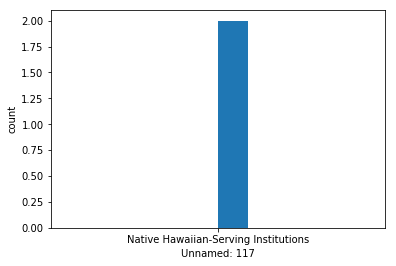

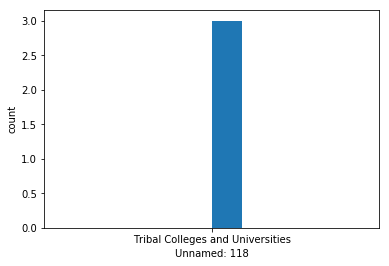

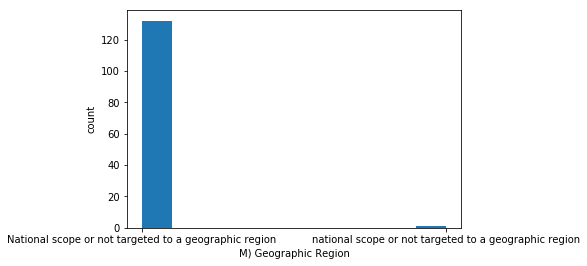

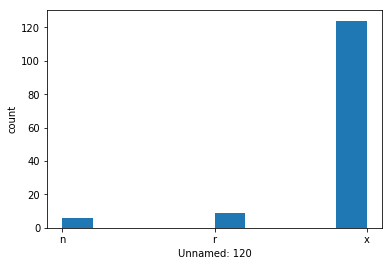

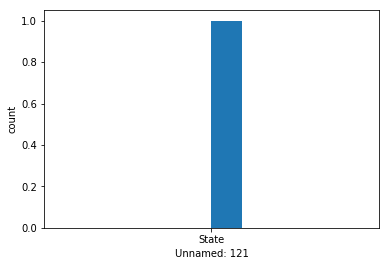

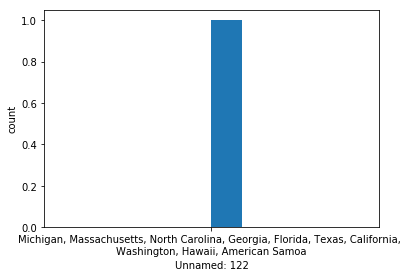

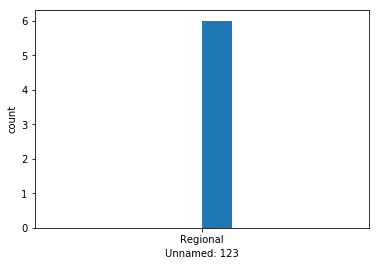

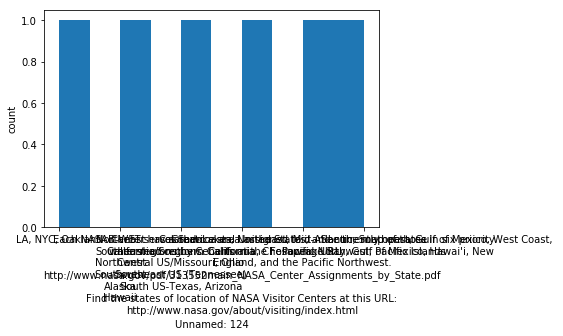

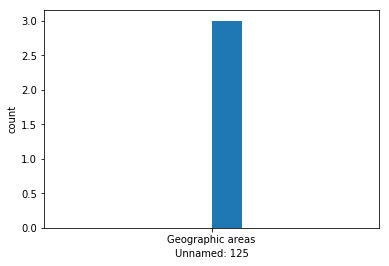

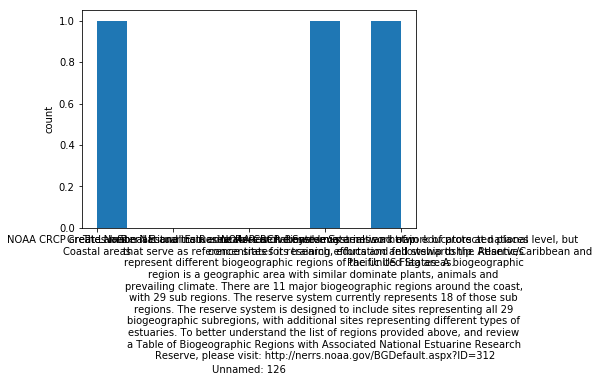

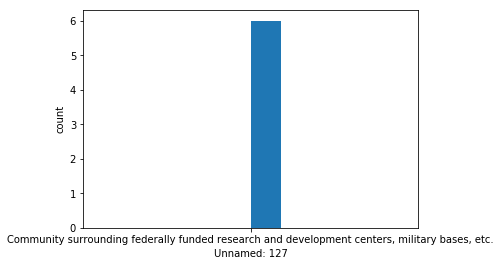

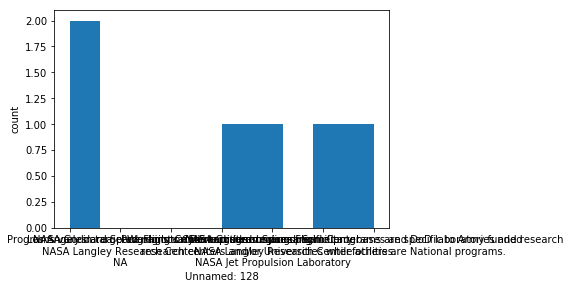

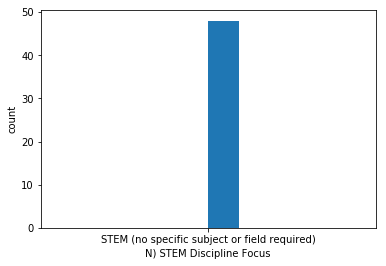

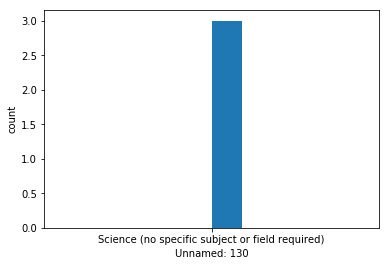

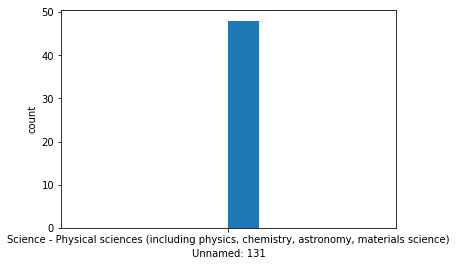

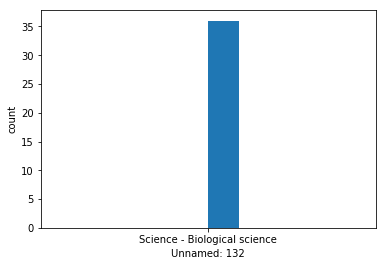

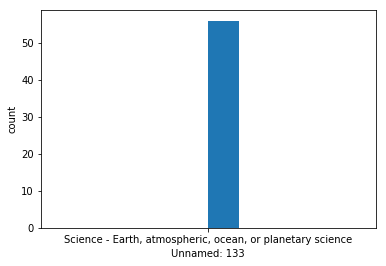

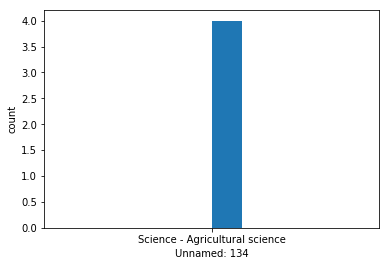

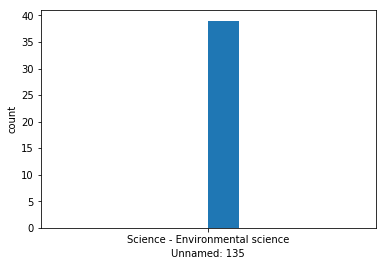

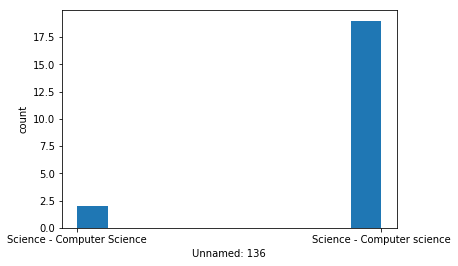

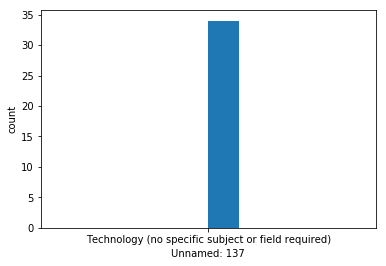

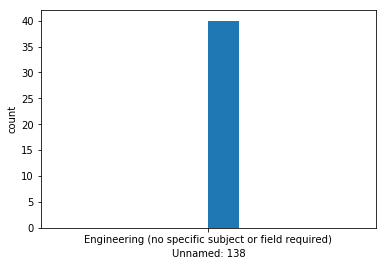

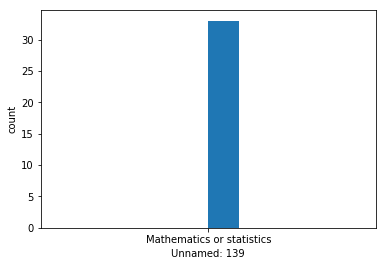

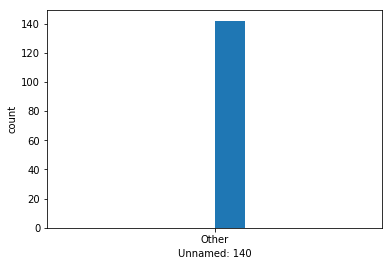

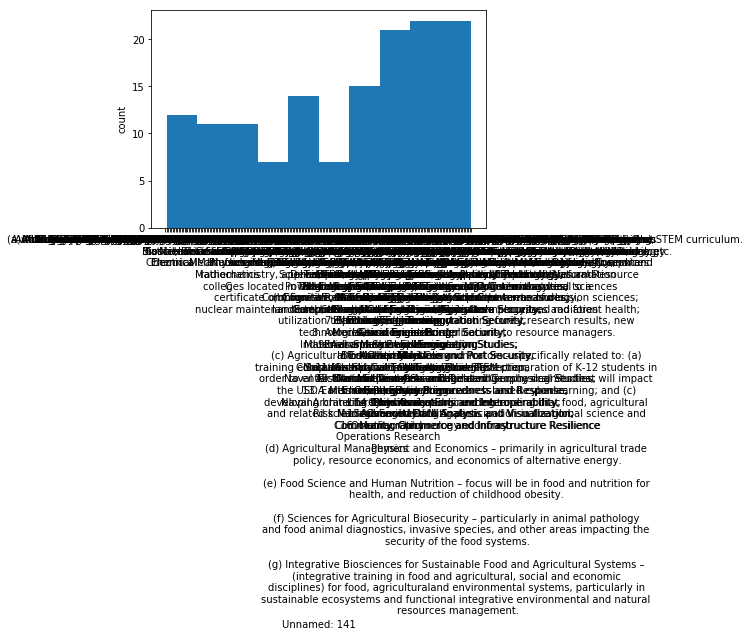

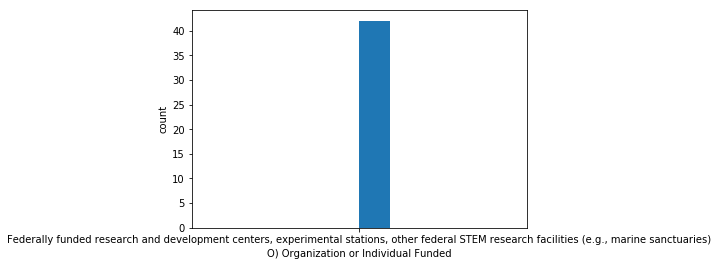

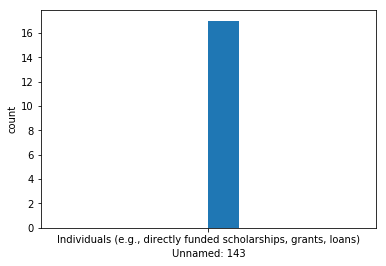

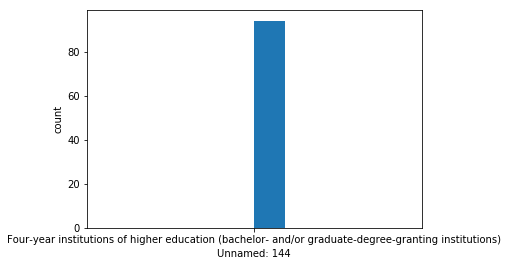

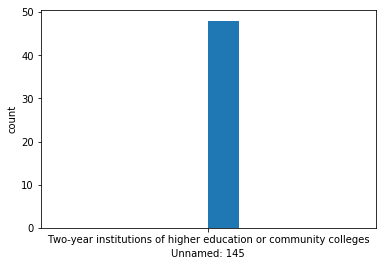

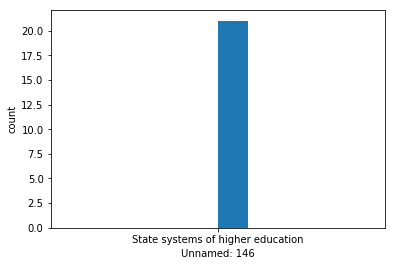

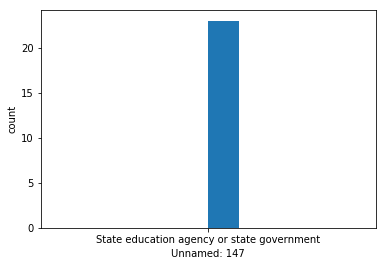

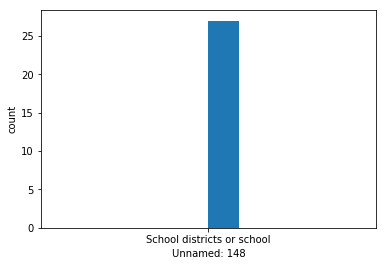

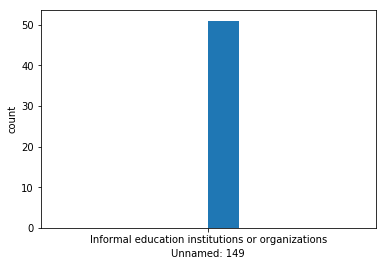

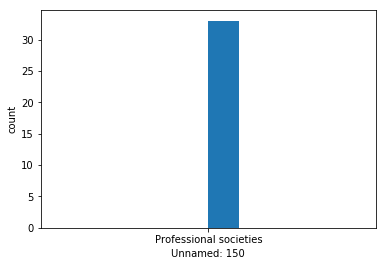

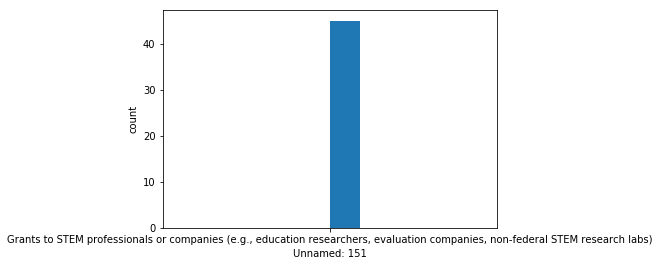

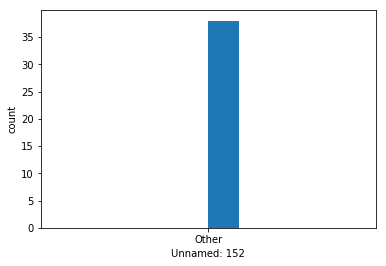

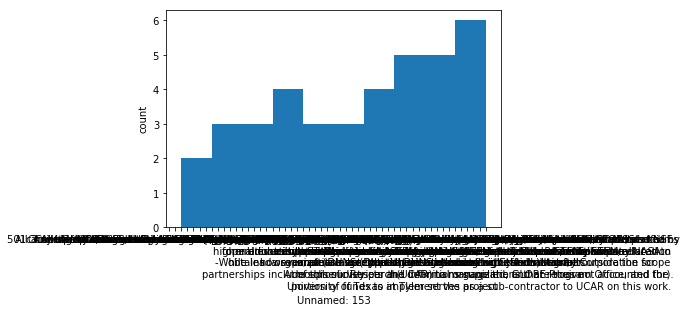

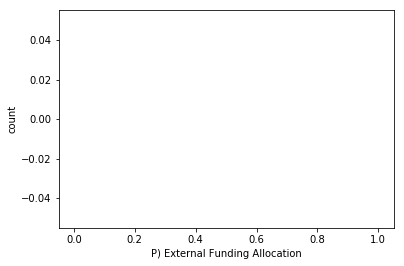

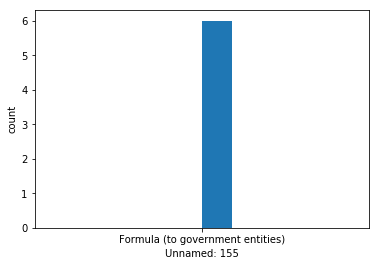

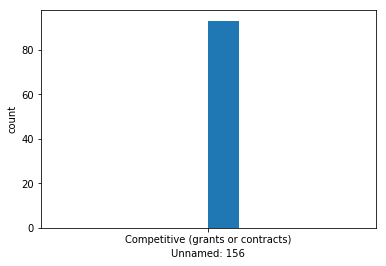

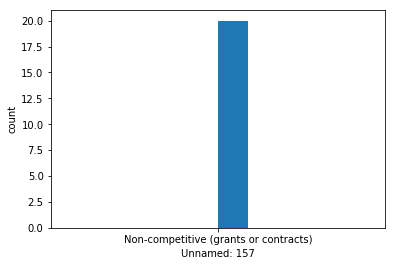

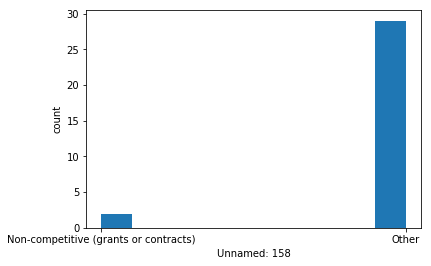

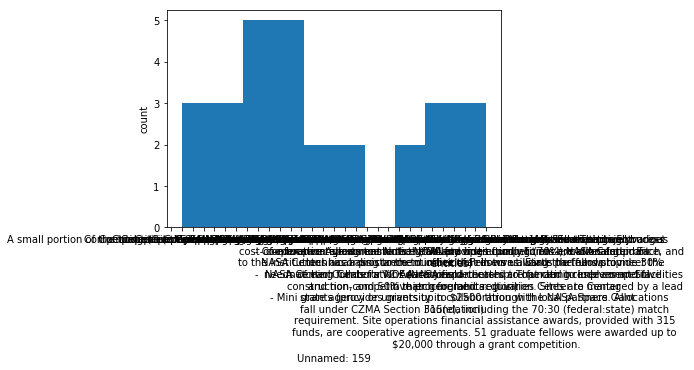

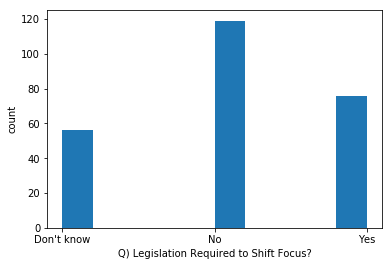

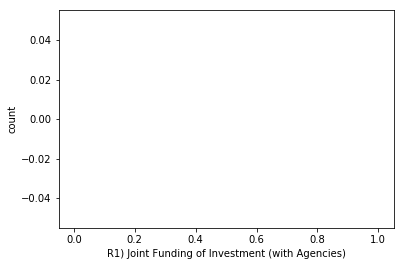

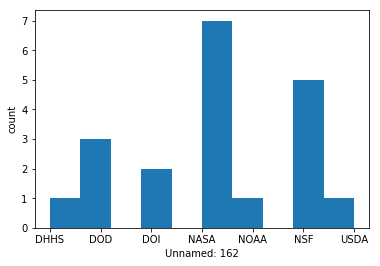

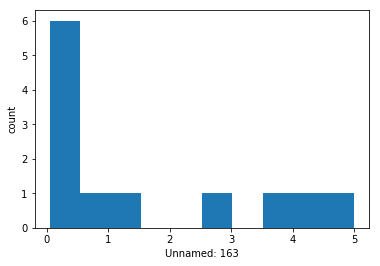

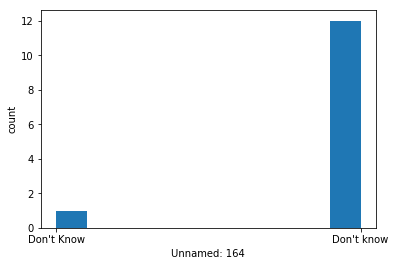

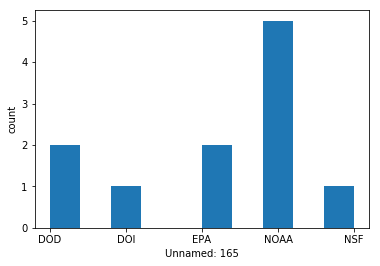

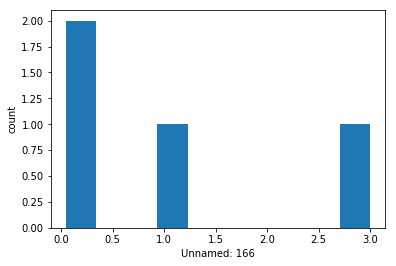

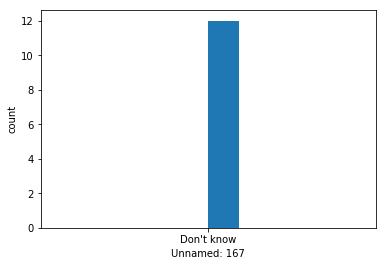

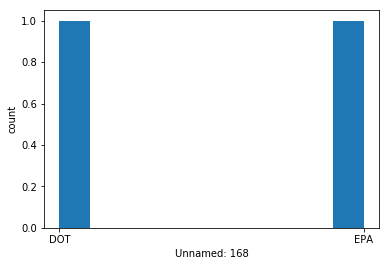

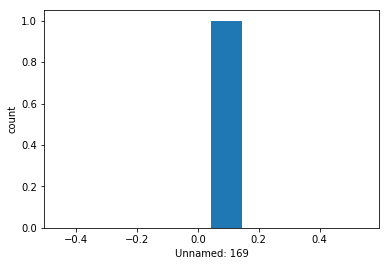

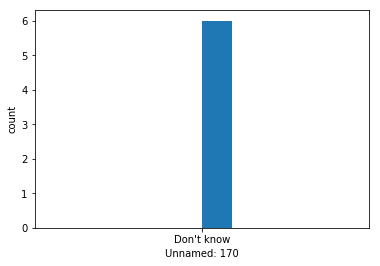

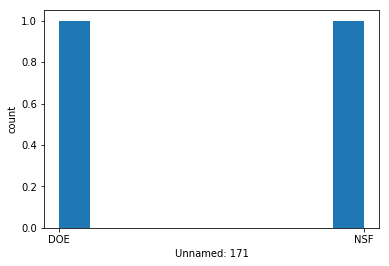

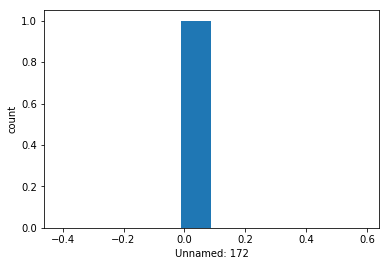

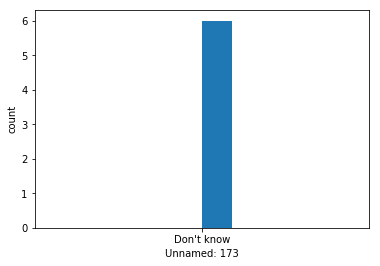

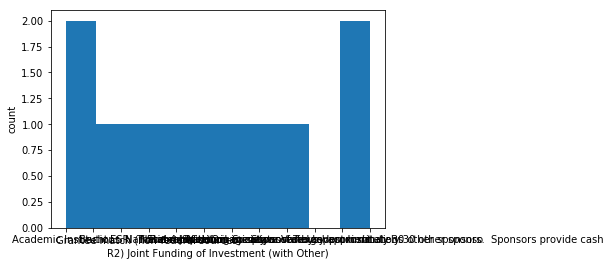

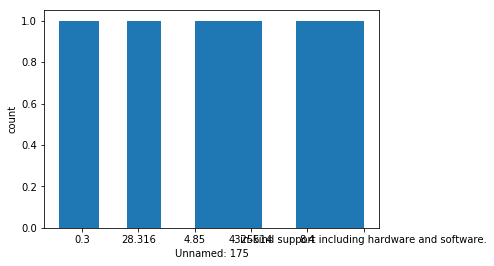

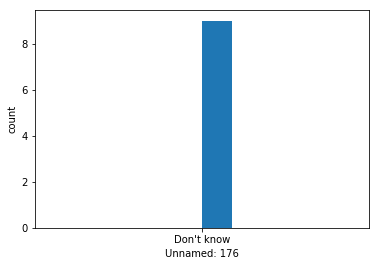

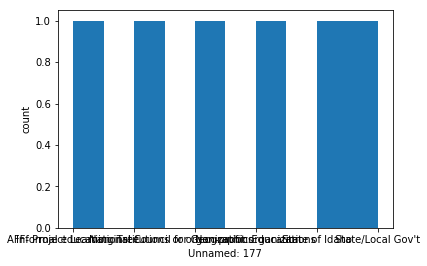

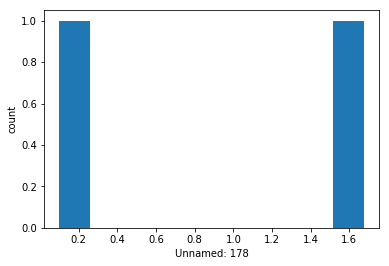

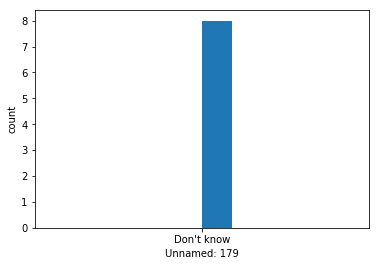

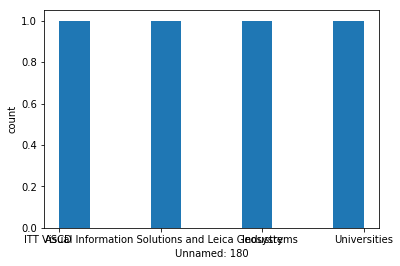

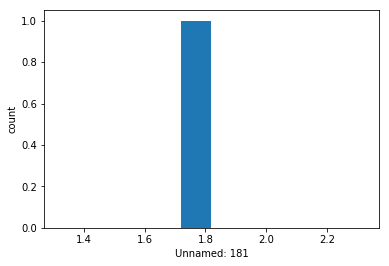

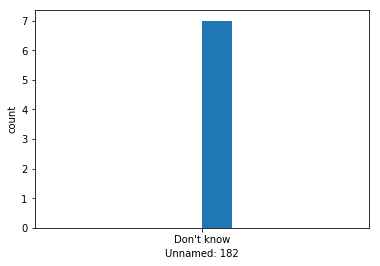

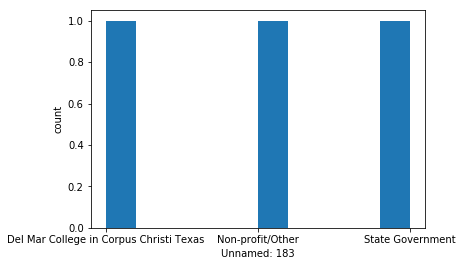

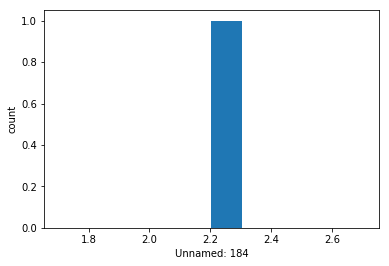

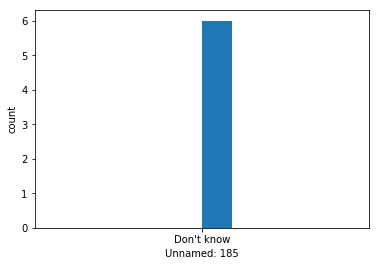

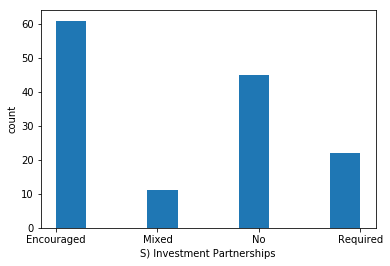

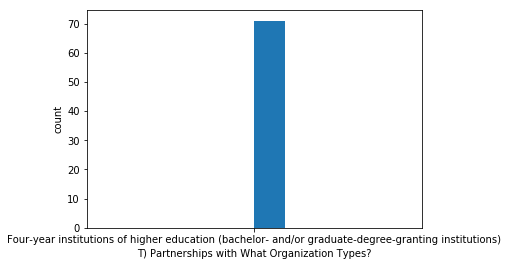

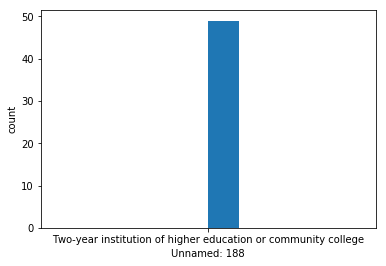

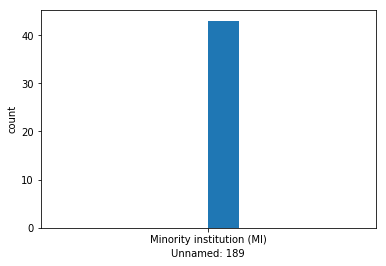

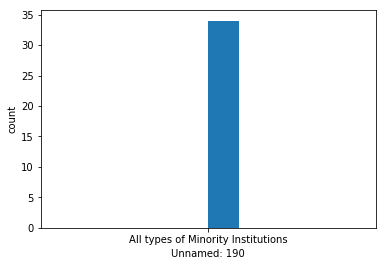

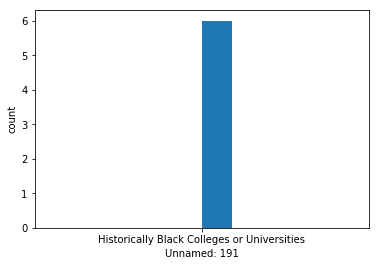

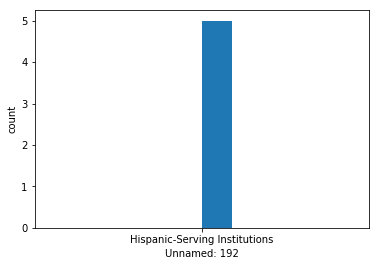

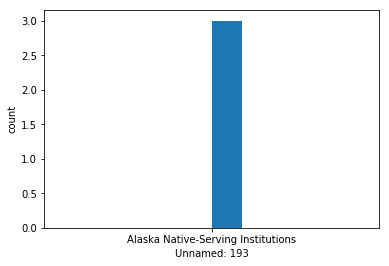

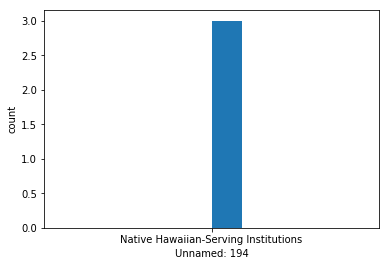

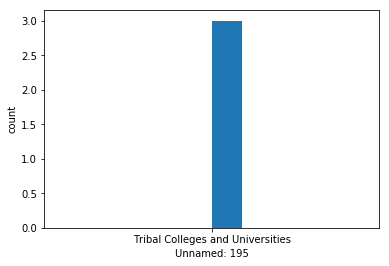

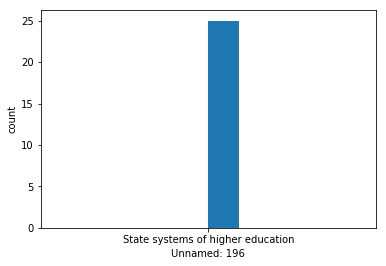

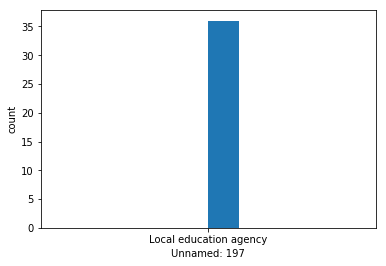

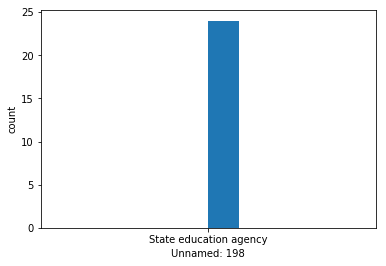

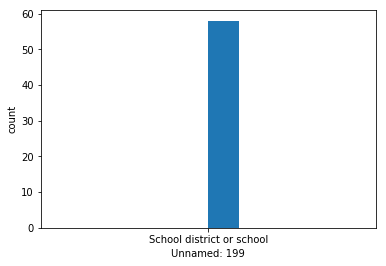

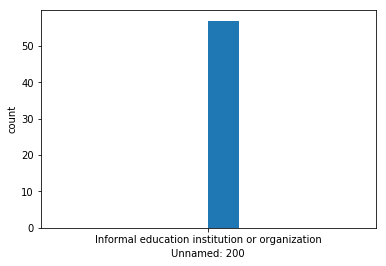

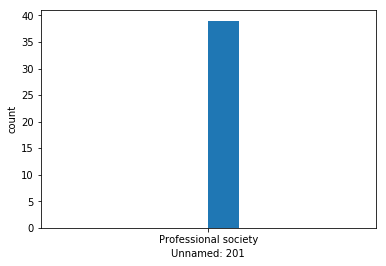

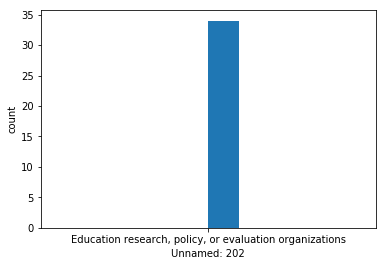

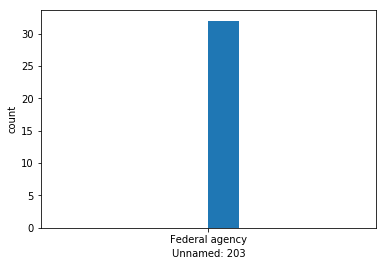

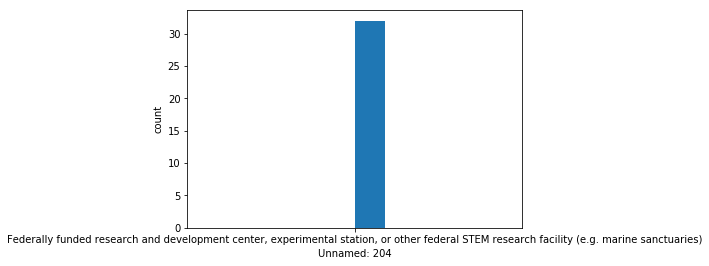

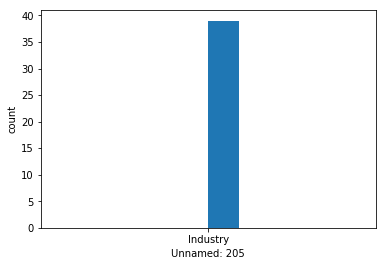

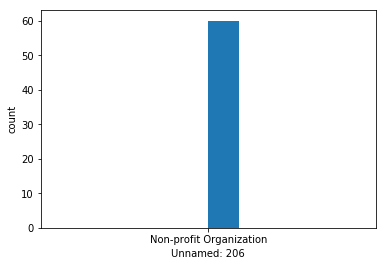

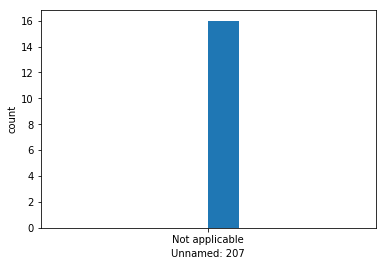

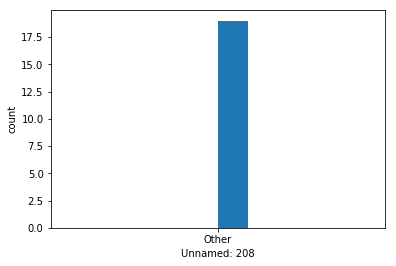

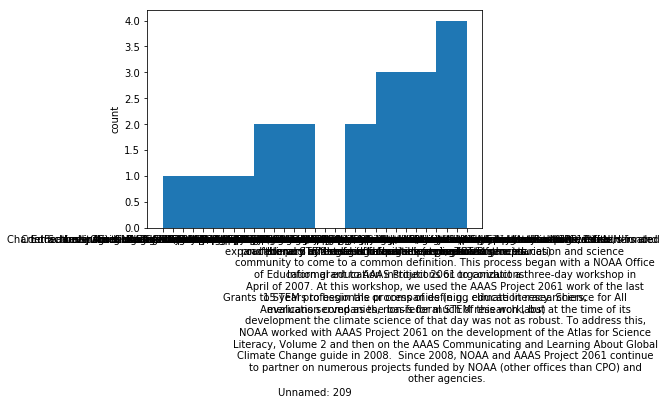

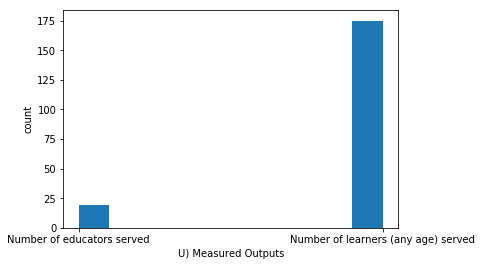

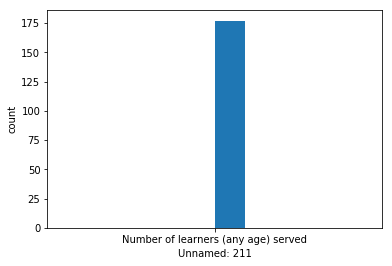

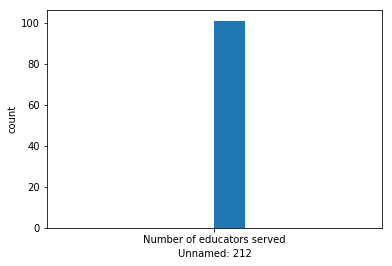

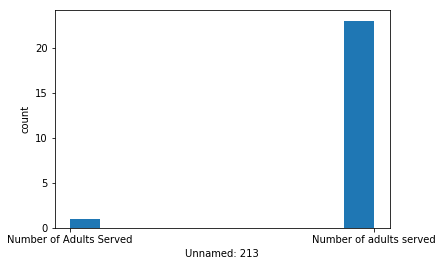

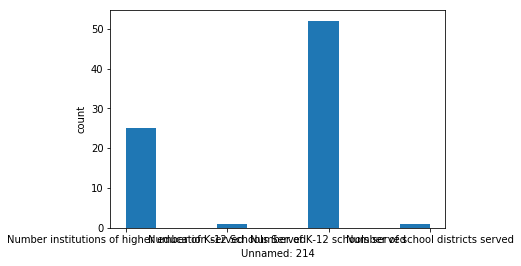

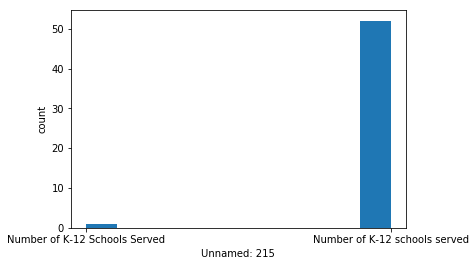

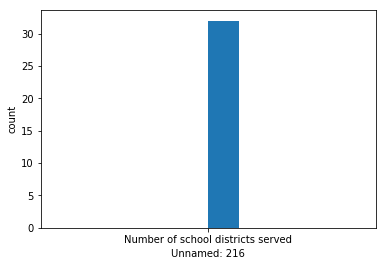

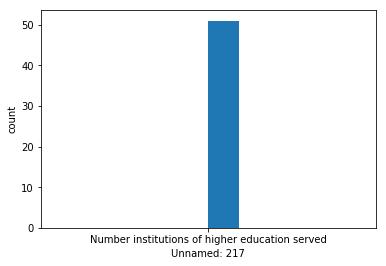

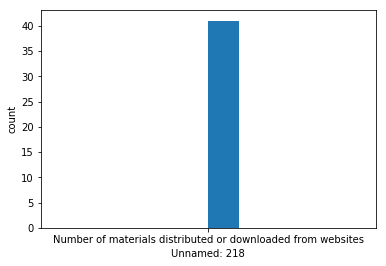

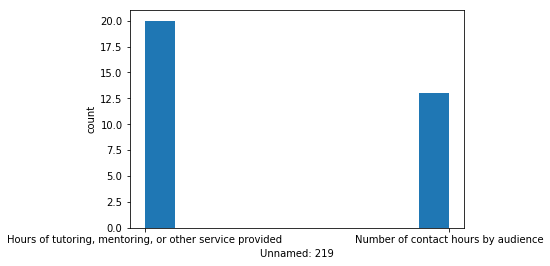

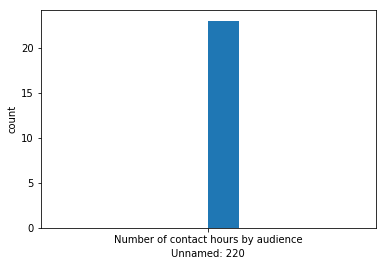

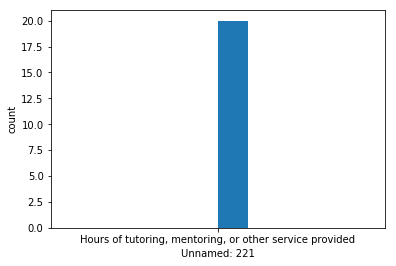

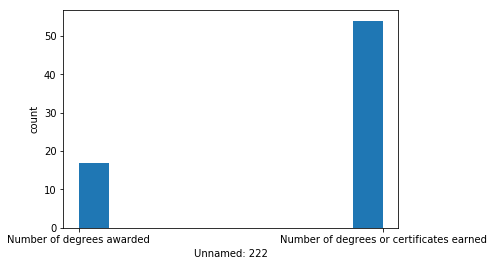

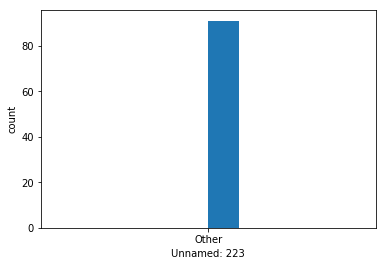

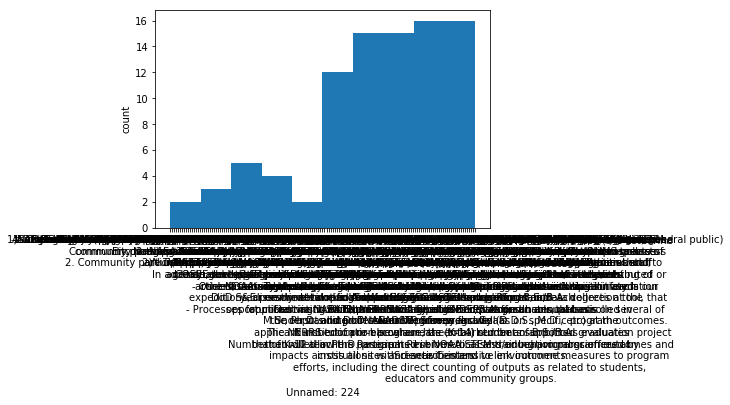

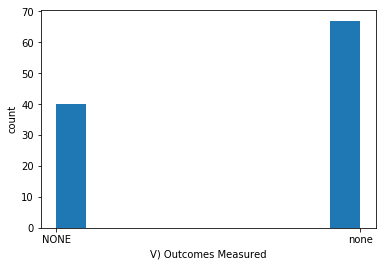

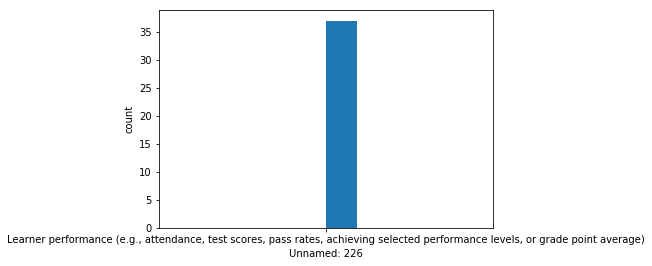

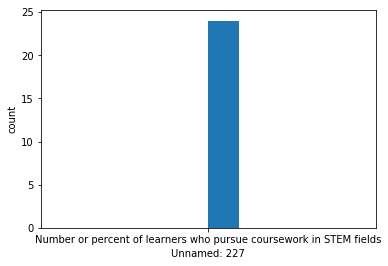

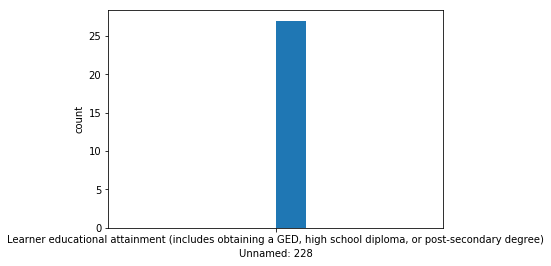

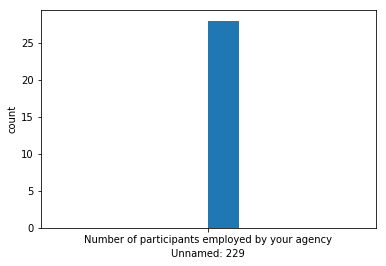

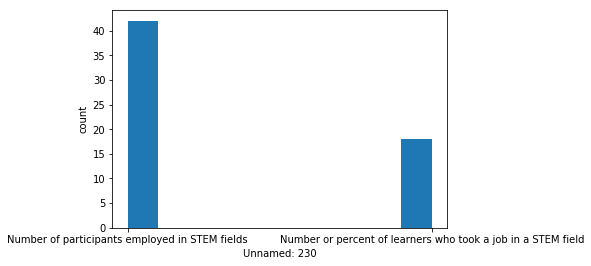

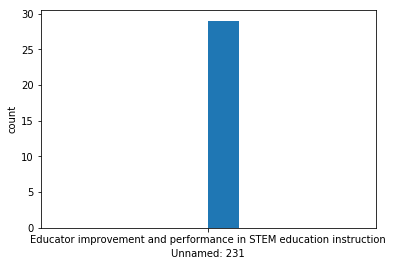

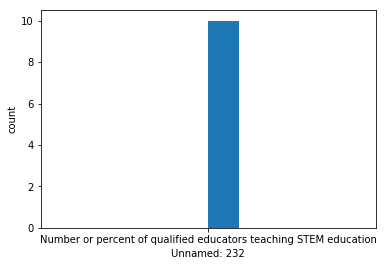

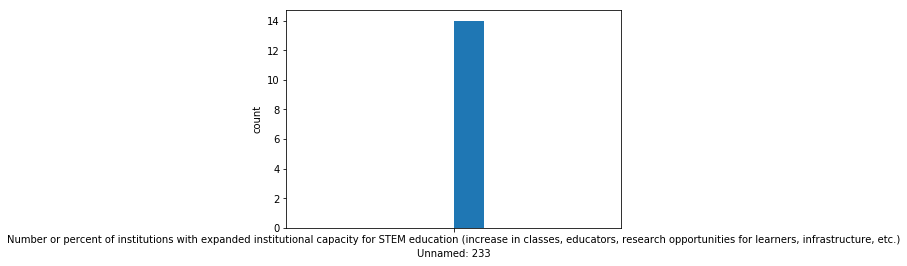

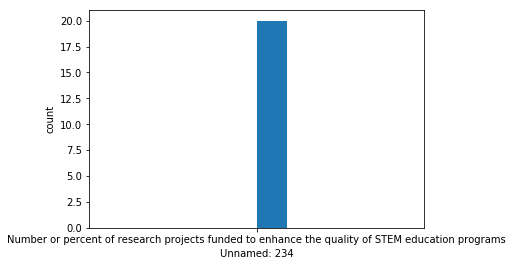

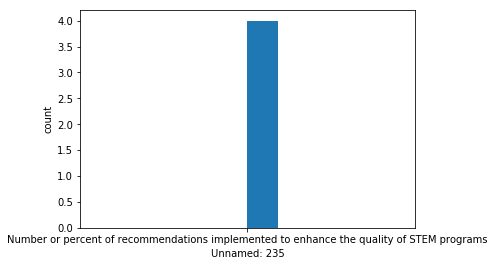

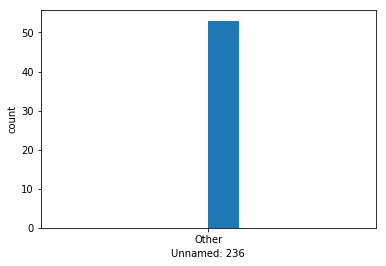

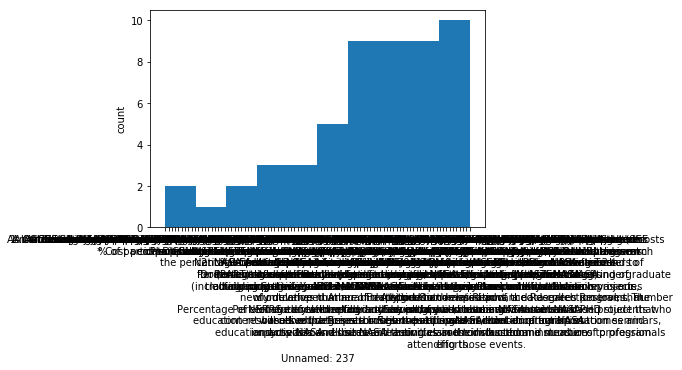

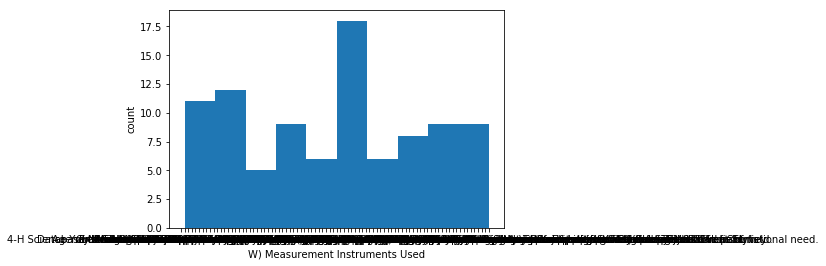

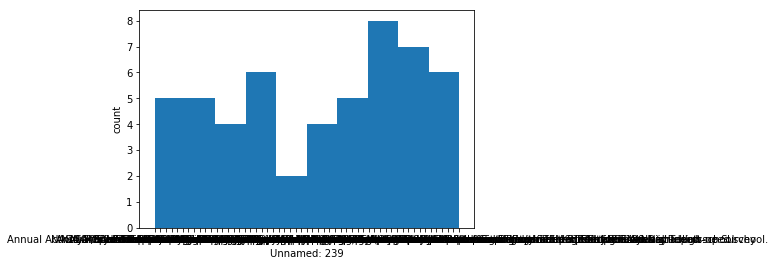

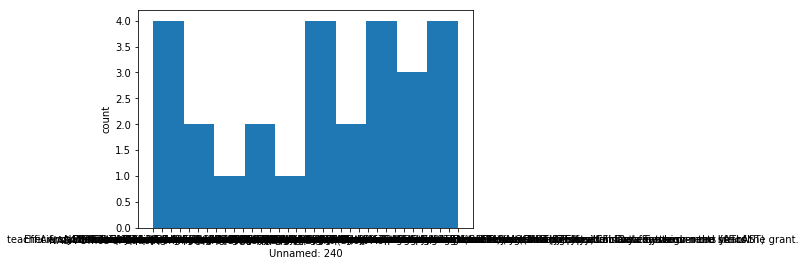

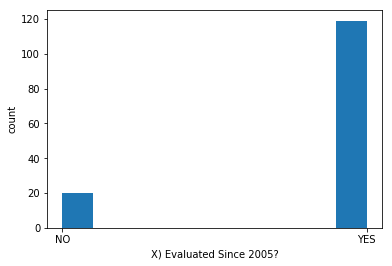

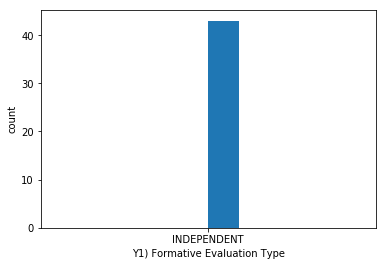

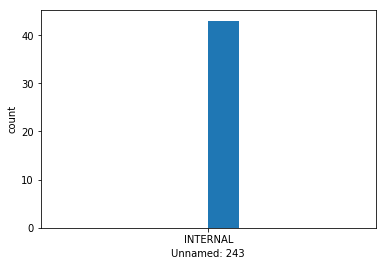

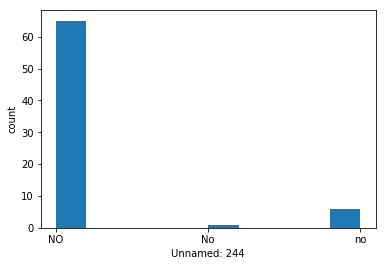

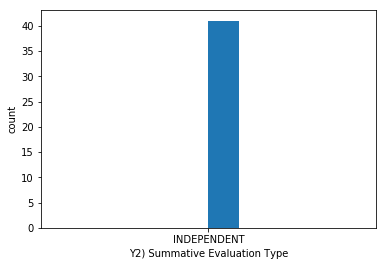

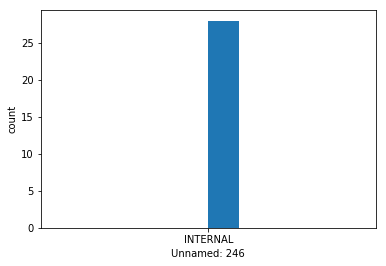

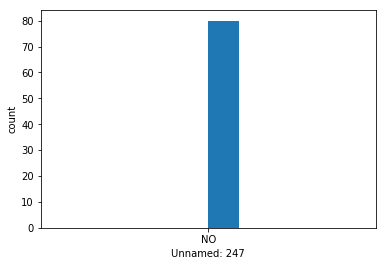

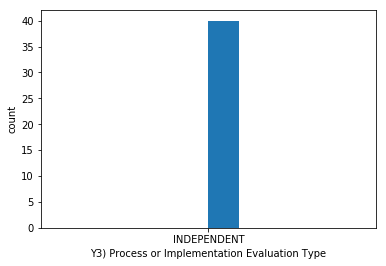

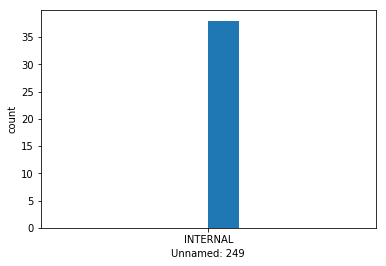

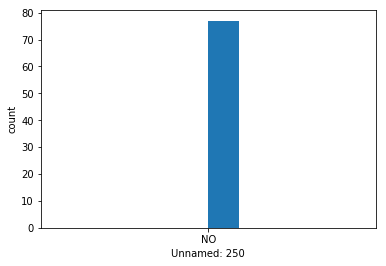

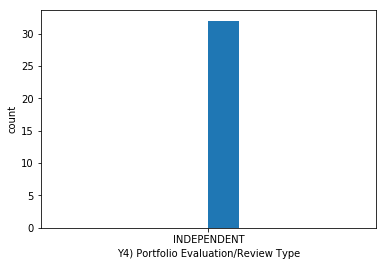

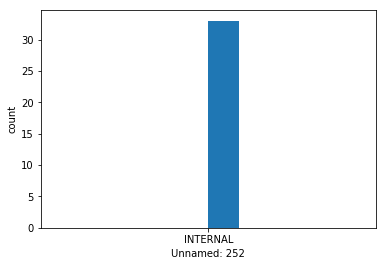

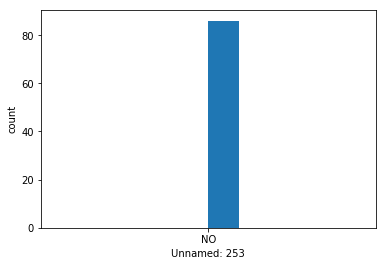

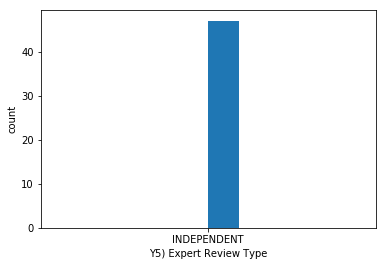

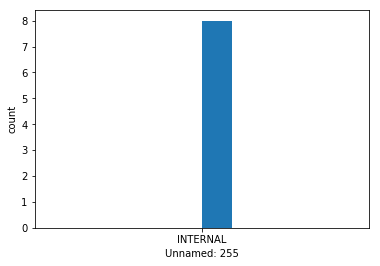

In [9]:
def plot():
    attribute_list = data.columns.tolist() 
    x=0
    for i in attribute_list:
        if((i == 'C1) Funding FY2008') or (i == 'C2) Funding FY2009') or (i == 'C3) Funding FY2010') ):
            continue
        
        else:
            t=data[i].dropna()
            fig,ax=plt.subplots()
            plt.hist(t)
            ax.set_xlabel(i)
            ax.set_ylabel('count')
            plt.show(ax)
#plot()

### Mutual info scores

In [10]:
#Calculating mutual_info_score
from sklearn import metrics
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

### Converting string fields to numbers

In [13]:
# Converting string fields to no for analysis 
df = per_change_df
target = np.array(per_change_df['Target']).ravel()
for i in df:      
    try:
        df[i]=label.fit_transform(df[i])
    except:
        df[i]=label.fit_transform(df[i].astype('str'))

In [15]:
variables=[]
mi_scores=[]
# calculating mutual_info_score
for i in df:
    if((i == 'C1) Funding FY2008') or (i == 'C2) Funding FY2009') or (i == 'C3) Funding FY2010') ):
        continue
        
    else:
        x = df[i].ravel()
        score = metrics.mutual_info_score(x,target)
        mi_scores.append(score)
        variables.append(i)  

mutual_info_df=pd.DataFrame({'Variables':variables,'MI Score':mi_scores})
    
mutual_info_df.head(5)

,MI Score,Variables
0,0.686563,Index Number
1,0.681084,Investment Name
2,0.094299,Agency
3,0.245920,Subagency
4,0.686563,A) Brief Description


## Step 3

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [20]:
# matrix of features 
X = df.iloc[:, 1:256].values
y = df.iloc[:, 257].values
#Divide data into train & test samples. (70-30 split)
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 0 )

classifier = XGBClassifier()
classifier.fit(X_train,y_train,eval_metric='auc')

y_pred = classifier.predict(X_test)
Xtest_predprob = classifier.predict_proba(X_test)[:,1]
# checking roc_auc_score on test sample.
cm = confusion_matrix(y_test,y_pred)
print("Comfusion matrix\n ",cm)
print("AUC Score: %f" % metrics.roc_auc_score(y_test, Xtest_predprob))

NameError: name 'XGBClassifier' is not defined